# Applying Machine Learning to Ames housing data to predict sale prices
## Shameer Sukha - Feb 2020

This notebook applies machine learning techniques to the Ames housing data to predict **sales prices** from various other variables related to a house. It is in response to the NYDSA - Machine Learning project.

It conducts a walk-through of the data science lifecycle for machine learning comprising of data cleaning, imputation, analysis, wrangling, visualisation and finally modelling.

## Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_regression
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
import xgboost as xgb

## Print information about data for reference

In [2]:
filename = '.\data\data_description.txt'
with open(filename) as f:
    for line in f:
        print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

## Load Data
1. Use downloaded train data from Kaggle, test data is not useful since it does not contain SalePrice because of competition



In [3]:
# Read .csv files
housing = pd.read_csv('./data/train.csv')
housing.shape

(1460, 81)

## Data Exploration
1. Create useful initial summary of variables, which will help with **missingness**, **imputation** and **feature selection**
2. Create charts and stats to summarise SalePrice target variable
3. Create charts and stats to summarise SalePrice with features expected to be important
3. Create charts and stats to understand relationships amongst all variables with themselves and avoid multicollinearity

In [4]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# Year is an ordinal variable because inflation and age affects values so leave as numeric type. 
# However month is categorical not numerical - MoSold
# In addition MSSubClass is categorical but stored as numerical
# Convert these two variables as strings
housing['MSSubClass'] = housing['MSSubClass'].apply(str)
housing['MoSold'] = housing['MoSold'].astype(str)

In [6]:
def bespoke_pcorr(df, response, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    correlation of response variable with other variables in df and labels the 
    column varname.
    """
    response_corr = pd.DataFrame(df.corr(method='spearman')[response]).reset_index()
    response_corr.columns = [varname, 'SpearmanCorr']
    return response_corr


def bespoke_outliers(df, factor, varname):
    """
    Takes a dataframe df of numerical variables and returns a dataframe of the 
    number of outliers past factor multiple of the inter-quartile range according to the Tukey method.
    """
    # Define helper function to count outliers in a given column col past a factor multiple of the
    # inter-quartile range
    def count_outliers(col, factor):
        try:
            #1st quartile (25%)
            Q1 = np.percentile(col, 25)
            # 3rd quartile (75%)
            Q3 = np.percentile(col, 75)
            # Interquartile range (IQR)
            IQR = Q3 - Q1
        
            # outlier step
            outlier_step = factor * IQR
        
            # Determine a list of indices of outliers for feature col
            numout = col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)].shape[0]
            return numout
        except:
            return 0

    outliers = pd.DataFrame(df.apply(lambda x: count_outliers(x, factor), axis=0)).reset_index()
    outliers.columns = [varname, 'NumOutliers']
    
    return outliers   


# Define own function to summarise data
def summarise_data(df, response):
    """
    Takes a dataframe df of numerical of numerical and categorical variables and creates a bespoke
    summary that is helpful for regression/predictive tasks. The target variable is identified with 
    response input and the rest are assumed to be features.
    
    Output shows columns as follows:
    1. Predictor variable name
    2. Count of values in feature 
    3. Count of missing values
    4. Total length of column
    5. Percentage missing in each feature
    6. Type of feature: numerical or categorical
    7. If categorical variable, then number of catgories
    8. If numerical variable, the skewness (0 being no skew of Normal dist)
    9. If numerical variable, Spearman correlation with target variable identified in response
    10. If numerical variable, Number of outliers based on Tukey's method of factor (1.5) times inter-quartile range
    """
    tempdf = pd.DataFrame(df.count()).reset_index()
    tempdf.columns = ['Predictor', 'ValueCount']
    tempdf['MissingCount'] = tempdf['Predictor'].apply(lambda x: df[x].isnull().sum())
    tempdf['TotalCount'] = tempdf['ValueCount'] + tempdf['MissingCount']
    tempdf['MissingPercent'] = tempdf['MissingCount'] / len(df)
    tempdf['VariableType'] = tempdf['Predictor'].apply(lambda x: 'categorical' if df[x].dtype=='object' else 'numerical')
    tempdf['CountCategories'] = [len(df[col].value_counts()) if df[col].dtype == 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf['Skewness'] = [stats.skew(df[col]) if df[col].dtype != 'object' else 0 for col in 
                          tempdf['Predictor'].values]
    tempdf = tempdf.merge(bespoke_pcorr(df, response, 'Predictor'), how='left', on='Predictor')
    tempdf = tempdf.merge(bespoke_outliers(df, 1.5, 'Predictor'), how='left', on='Predictor')
    tempdf.reset_index(drop=True, inplace=True)
        
    return tempdf


In [7]:
# Variables with missing values ranked by percentage missing
summarydf = summarise_data(housing, 'SalePrice')
mask = summarydf.MissingPercent > 0
missing_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('MissingPercent', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
72,PoolQC,7,1453,1460,0.995205,categorical,3,0.0,NaN,0
74,MiscFeature,54,1406,1460,0.963014,categorical,4,0.0,NaN,0
6,Alley,91,1369,1460,0.937671,categorical,2,0.0,NaN,0
73,Fence,281,1179,1460,0.807534,categorical,4,0.0,NaN,0
57,FireplaceQu,770,690,1460,0.472603,categorical,5,0.0,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.409076,30
58,GarageType,1379,81,1460,0.055479,categorical,6,0.0,NaN,0
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.593788,0
60,GarageFinish,1379,81,1460,0.055479,categorical,3,0.0,NaN,0
63,GarageQual,1379,81,1460,0.055479,categorical,5,0.0,NaN,0


In [8]:
summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
0,Id,1460,0,1460,0.000000,numerical,0,0.000000,-0.018546,0
1,MSSubClass,1460,0,1460,0.000000,categorical,15,0.000000,NaN,0
2,MSZoning,1460,0,1460,0.000000,categorical,5,0.000000,NaN,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.409076,30
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.456461,69
...,...,...,...,...,...,...,...,...,...,...
76,MoSold,1460,0,1460,0.000000,categorical,12,0.000000,NaN,0
77,YrSold,1460,0,1460,0.000000,numerical,0,0.096170,-0.029899,0
78,SaleType,1460,0,1460,0.000000,categorical,9,0.000000,NaN,0
79,SaleCondition,1460,0,1460,0.000000,categorical,6,0.000000,NaN,0


In [9]:
# Store lists of names of numerical and categorical features
mask = summarydf.VariableType == 'categorical'
categorical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of categorical variables are: %.0i' %len(categorical_vars))
mask = summarydf.VariableType == 'numerical'
numerical_vars = list(summarydf.loc[mask, 'Predictor'])
print('The number of numerical variables are: %.0i' %len(numerical_vars))

The number of categorical variables are: 45
The number of numerical variables are: 36


In [10]:
# Variables with skewness greater than 0.6, ranked by skewness
mask = (np.abs(summarydf.Skewness) > 0.6) & (summarydf.VariableType == 'numerical')
skew_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
75,MiscVal,1460,0,1460,0.0,numerical,0,24.451640,-0.062727,52
71,PoolArea,1460,0,1460,0.0,numerical,0,14.813135,0.058453,7
4,LotArea,1460,0,1460,0.0,numerical,0,12.195142,0.456461,69
69,3SsnPorch,1460,0,1460,0.0,numerical,0,10.293752,0.065440,24
45,LowQualFinSF,1460,0,1460,0.0,numerical,0,9.002080,-0.067719,26
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.164826,68
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.250888,-0.038806,167
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.117977,0.100070,116
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,-0.012189,82
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.086696,-0.218394,208


In [11]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
mask = (np.abs(summarydf.SpearmanCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('SpearmanCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,1.000000,61
17,OverallQual,1460,0,1460,0.000000,numerical,0,0.216721,0.809829,2
46,GrLivArea,1460,0,1460,0.000000,numerical,0,1.365156,0.731310,31
61,GarageCars,1460,0,1460,0.000000,numerical,0,-0.342197,0.690711,5
19,YearBuilt,1460,0,1460,0.000000,numerical,0,-0.612831,0.652682,7
62,GarageArea,1460,0,1460,0.000000,numerical,0,0.179796,0.649379,21
49,FullBath,1460,0,1460,0.000000,numerical,0,0.036524,0.635957,0
38,TotalBsmtSF,1460,0,1460,0.000000,numerical,0,1.522688,0.602725,61
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.593788,0
43,1stFlrSF,1460,0,1460,0.000000,numerical,0,1.375342,0.575408,20


In [12]:
# Variables with large number of outliers ranked by count of possible outliers
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.000000,numerical,0,3.086696,-0.218394,208
36,BsmtFinSF2,1460,0,1460,0.000000,numerical,0,4.250888,-0.038806,167
18,OverallCond,1460,0,1460,0.000000,numerical,0,0.692355,-0.129325,125
70,ScreenPorch,1460,0,1460,0.000000,numerical,0,4.117977,0.100070,116
26,MasVnrArea,1452,8,1460,0.005479,numerical,0,NaN,0.421309,96
48,BsmtHalfBath,1460,0,1460,0.000000,numerical,0,4.099186,-0.012189,82
67,OpenPorchSF,1460,0,1460,0.000000,numerical,0,2.361912,0.477561,77
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.456461,69
52,KitchenAbvGr,1460,0,1460,0.000000,numerical,0,4.483784,-0.164826,68
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,1.000000,61


In [13]:
def chart_singlevar_dist(df, response):
    """
    Takes a dataframe df with identified target variable in response  and plots histogram, box plot and qq-plot. 
    This will help to quickly identify normality.
    """
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    
    sns.distplot(df[response], norm_hist=True, ax=ax[0,0])
    sns.boxplot(df[response], ax=ax[1,0])
    stats.probplot(df[response], plot=ax[2,0])
    ax[2,0].set(title='')   
    
    sns.distplot(np.log1p(df[response]), norm_hist=True, ax=ax[0,1])
    ax[0,1].set(xlabel = 'log 1+'+response)
    sns.boxplot(np.log1p(df[response]), ax=ax[1,1])
    ax[1,1].set(xlabel = 'log 1+'+response)
    stats.probplot(np.log1p(df[response]), plot=ax[2,1])
    ax[2,1].set(xlabel = 'log 1+'+response, title='')
    
    return fig.show()

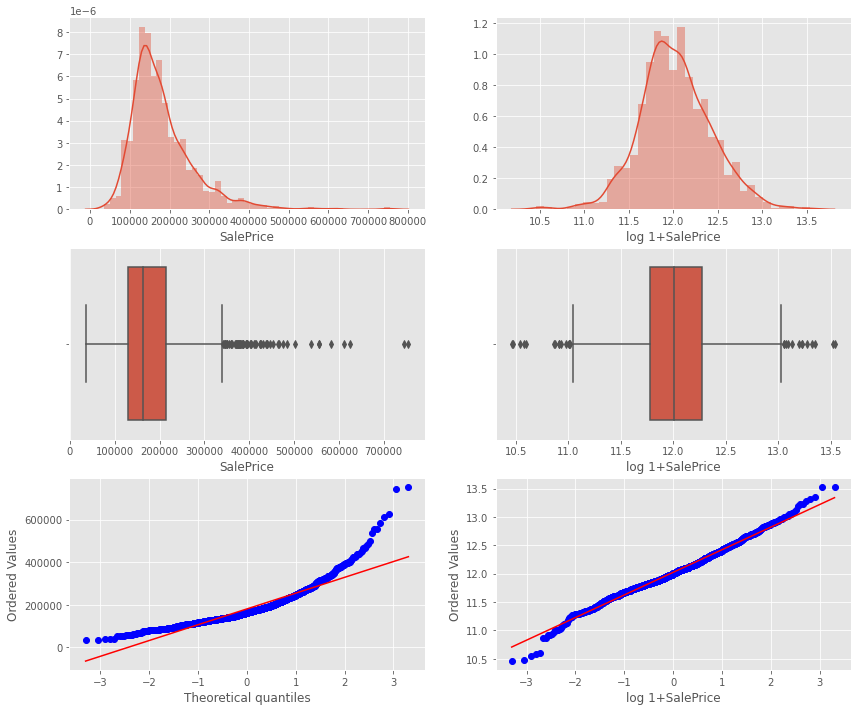

In [14]:
chart_singlevar_dist(housing, 'SalePrice')

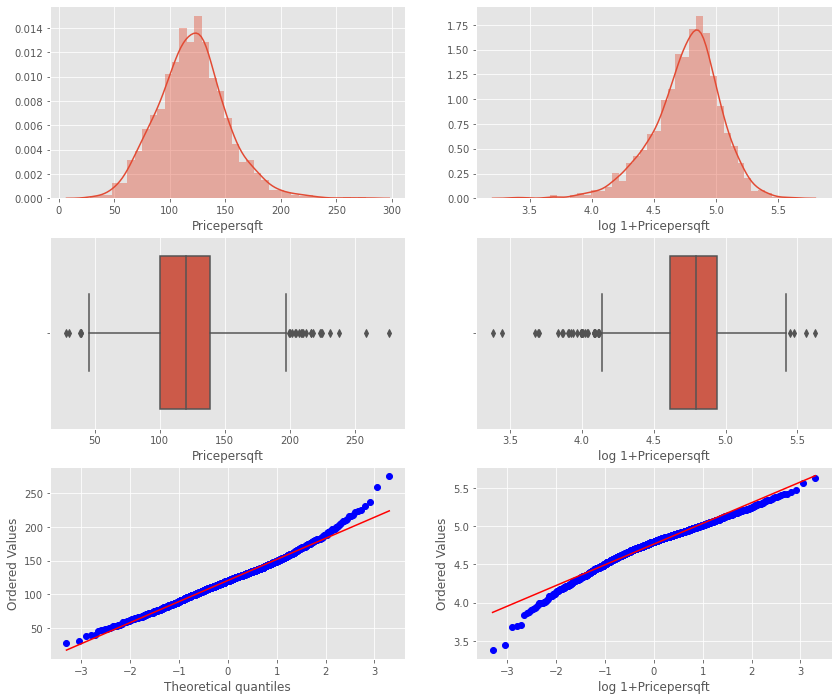

In [15]:
# Create SalePrice per square foot variable and check distribution (no data missing so all good)
housing['Pricepersqft'] = (housing['SalePrice'] / housing['GrLivArea'])
chart_singlevar_dist(housing, 'Pricepersqft')

In [16]:
# No need to use log SalePrice since Pricepersqft variable has much better properties than SalePrice itself.
# Set Pricepersqft as target variable
target = housing.Pricepersqft

In [17]:
summarydf[summarydf.VariableType == 'numerical']

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
0,Id,1460,0,1460,0.000000,numerical,0,0.000000,-0.018546,0
3,LotFrontage,1201,259,1460,0.177397,numerical,0,NaN,0.409076,30
4,LotArea,1460,0,1460,0.000000,numerical,0,12.195142,0.456461,69
17,OverallQual,1460,0,1460,0.000000,numerical,0,0.216721,0.809829,2
18,OverallCond,1460,0,1460,0.000000,numerical,0,0.692355,-0.129325,125
19,YearBuilt,1460,0,1460,0.000000,numerical,0,-0.612831,0.652682,7
20,YearRemodAdd,1460,0,1460,0.000000,numerical,0,-0.503044,0.571159,0
26,MasVnrArea,1452,8,1460,0.005479,numerical,0,NaN,0.421309,96
34,BsmtFinSF1,1460,0,1460,0.000000,numerical,0,1.683771,0.301871,7
36,BsmtFinSF2,1460,0,1460,0.000000,numerical,0,4.250888,-0.038806,167


In [18]:
# Linear models are susceptible to features that are not roughly of the same domain in terms of magnitude.
# Hence convert all area variables to be percentage of GrLivArea, which will help normalise information
areavars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',\
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for v in areavars:
    housing[v] = housing[v] / housing['GrLivArea']
housing[areavars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.049868,7.202209,0.061781,0.311646,0.034900,0.387452,0.733998,0.806435,0.190271,0.003294,0.323993,0.062473,0.029474,0.016225,0.002208,0.009642,0.001305
std,0.019868,5.418378,0.101957,0.300163,0.122030,0.294764,0.272310,0.226291,0.225099,0.027948,0.148638,0.085501,0.045608,0.045240,0.019318,0.036114,0.021980
min,0.013801,1.057771,0.000000,0.000000,0.000000,0.000000,0.000000,0.257544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036916,5.124285,0.000000,0.000000,0.000000,0.162419,0.500000,0.557612,0.000000,0.000000,0.246751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.046542,6.423132,0.000000,0.265037,0.000000,0.332269,0.781627,1.000000,0.000000,0.000000,0.311559,0.000000,0.016793,0.000000,0.000000,0.000000,0.000000
75%,0.060606,8.400450,0.105884,0.528956,0.000000,0.524760,1.000000,1.000000,0.439329,0.000000,0.402601,0.107107,0.042141,0.000000,0.000000,0.000000,0.000000
max,0.220779,105.719548,0.964088,1.000354,0.954545,1.000000,1.968079,1.000000,0.742456,0.382055,1.395973,0.585987,0.726389,0.369509,0.352288,0.344982,0.515206


In [19]:
# Variables that are highly correlated with SalePrice for initial indication of useful features
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.SpearmanCorr) > 0.3) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('SpearmanCorr', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
81,Pricepersqft,1460,0,1460,0.000000,numerical,0,0.375531,1.000000,25
19,YearBuilt,1460,0,1460,0.000000,numerical,0,-0.612831,0.565254,7
62,GarageArea,1460,0,1460,0.000000,numerical,0,0.629797,0.546614,119
38,TotalBsmtSF,1460,0,1460,0.000000,numerical,0,-0.459281,0.539134,1
59,GarageYrBlt,1379,81,1460,0.055479,numerical,0,NaN,0.496832,0
80,SalePrice,1460,0,1460,0.000000,numerical,0,1.880941,0.486805,61
20,YearRemodAdd,1460,0,1460,0.000000,numerical,0,-0.503044,0.481761,0
34,BsmtFinSF1,1460,0,1460,0.000000,numerical,0,0.533002,0.444882,0
43,1stFlrSF,1460,0,1460,0.000000,numerical,0,-0.411379,0.424628,0
17,OverallQual,1460,0,1460,0.000000,numerical,0,0.216721,0.408478,2


In [20]:
def corr_plot(df, varlist):
    """
    Takes a dataframe df and plots a spearman rank correlation chart of all combinations of variables identified
    in varlist list of variable names.
    """
    train_corr = df[varlist].corr(method='spearman')
    fig, ax = plt.subplots(figsize=(10, 8))
    # mask
    mask = np.triu(np.ones_like(train_corr, dtype=np.bool))
    # adjust mask and df
    corr = train_corr.iloc[1:,:-1].copy()
    # plot heatmap
    sns.heatmap(train_corr, mask=mask, annot=False, fmt=".2f", cmap='Blues',
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    # yticks
    plt.yticks(rotation=0)
    return plt.show()

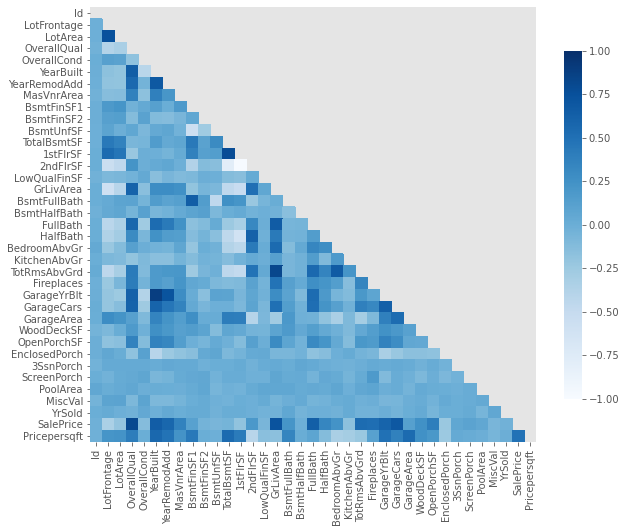

In [21]:
# Correlation plot of all variables
corr_plot(housing, list(housing.columns))

In [22]:
# Correlation plot of predictor variables with abs(corr) > 0.7 to detect multicollinearity
corr_matrix = housing.drop(['Id','Pricepersqft','SalePrice', 'GrLivArea'], axis=1).corr(method='spearman').corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol = pd.DataFrame(sol).reset_index()
sol.columns = ['var1','var2','cor']
print(sol.loc[sol.cor > 0.7,:])
mcvar = list(sol.loc[sol.cor > 0.7,:].drop('cor', axis=1).melt().value.unique())

            var1           var2       cor
0       1stFlrSF       2ndFlrSF  0.998210
1      YearBuilt    GarageYrBlt  0.985106
2    TotalBsmtSF       1stFlrSF  0.968066
3    LotFrontage        LotArea  0.965029
4    TotalBsmtSF       2ndFlrSF  0.963472
5   YearRemodAdd    GarageYrBlt  0.946384
6      YearBuilt   YearRemodAdd  0.928720
7    GarageYrBlt     GarageCars  0.903551
8       2ndFlrSF       HalfBath  0.902193
9      YearBuilt     GarageCars  0.899617
10   OverallQual     GarageCars  0.893572
11      1stFlrSF       HalfBath  0.893123
12   OverallQual       FullBath  0.888765
13  BedroomAbvGr   TotRmsAbvGrd  0.883031
14    BsmtFinSF1   BsmtFullBath  0.877217
15   OverallQual    GarageYrBlt  0.875276
16   OverallQual      YearBuilt  0.871057
17   LotFrontage   TotRmsAbvGrd  0.868357
18   OverallQual   YearRemodAdd  0.866284
19      2ndFlrSF   TotRmsAbvGrd  0.855801
20   LotFrontage       2ndFlrSF  0.854978
21   LotFrontage       1stFlrSF  0.852241
22      1stFlrSF   TotRmsAbvGrd  0

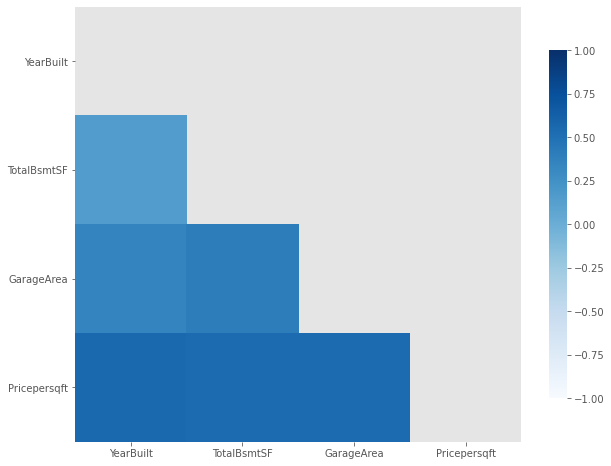

In [23]:
# Correlation plot of variables with >0.5 correlation with Pricepersqft to identify features that are useful
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.SpearmanCorr) > 0.5) & (summarydf.VariableType == 'numerical')
salescorr_vars = list(summarydf.loc[mask, 'Predictor'])
corr_plot(housing, salescorr_vars)

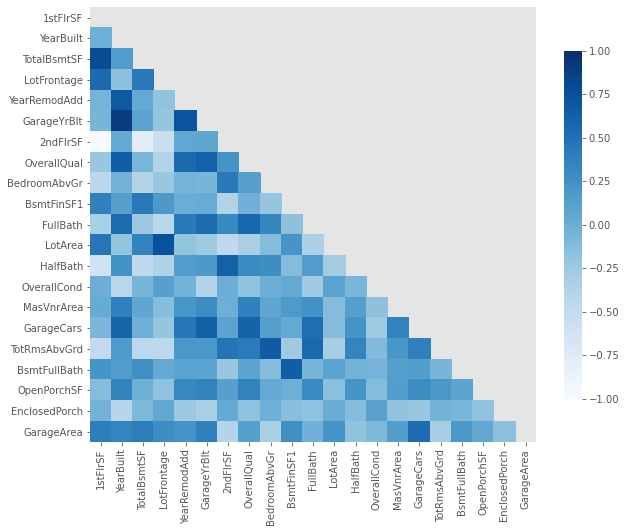

In [24]:
corr_plot(housing, mcvar)

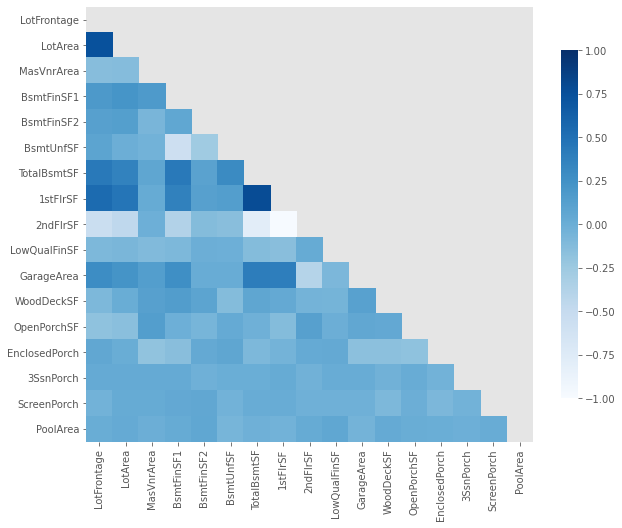

In [25]:
corr_plot(housing, areavars)

## Data Exploration Insights
1. There are 79 features with a sample of 1460 homes that we can use to try model SalePrice of homes in Ames. 
2. Initially, the features consist of 34 numerical and 45 categorical variables and has lots of missing data as well as apparent outliers.
3. There are a few skewed distributions of features, which would require some sort of transformation if using linear models to predict SalePrice.
4. The distribution of SalePrice itself, is skewed-right and 'Sale Price per square foot' makes the data look decently normal, which is encouraging if we want to apply the class of linear models.
5. Important predictors of Pricepersqft are: OverallQual, YearBuilt, variables related to size, variables related to Garage.
6. Initial assessments of Spearman correlation coefficients indicate there is duplicate information within features like: GarageCars/GarageArea, YrBuilt/GarageYrBlt, TotalBsmtSF/1stFlrSF, GrLivArea/TotRmsAbvGrd.
7. Before conducting feature engineering, we will pre-process data for missingness and duplication

## Dealing with missingness
1. Most data are not missing at random, they represent the lack of feature i.e don't have a pool or fireplace

In [26]:
# Straightforward Not Missing At Random (NMAR) in that missing means not available or present, set those to N
setnolist = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',\
             'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2','BsmtFinType1', 'BsmtCond',\
             'BsmtQual']
housing[setnolist] = housing[setnolist].fillna('N')

In [27]:
# Straightforward NMAR in that missing means not available or present, set those to None
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

In [28]:
# These variables are not straightforward to complete missingness

# Electrical
housing['Electrical'].value_counts()
# The category Mix represents a mixed electrical system and there is only one house with this system. Use this for the single missing value
# since it won't make a material difference.
housing['Electrical'] = housing['Electrical'].fillna('Mix')

# MasVnrArea
msonlist = ['MasVnrArea', 'MasVnrType']
housing.loc[housing['MasVnrArea'].isnull(), msonlist]
# It turns out that all of the houses with missing MasVnrArea don't have a Masonry Veneer. So can set to 0
housing['MasVnrArea'].fillna(0,inplace=True)

In [29]:
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]


,LotFrontage,LotArea,LotShape,Street
7,NaN,4.967464,IR1,Pave
12,NaN,14.219298,IR2,Pave
14,NaN,8.715084,IR1,Pave
16,NaN,11.196215,IR1,Pave
24,NaN,7.779245,IR1,Pave
...,...,...,...,...
1429,NaN,8.712500,IR1,Pave
1431,NaN,5.144050,IR1,Pave
1441,NaN,5.219340,Reg,Pave
1443,NaN,9.300420,Reg,Pave


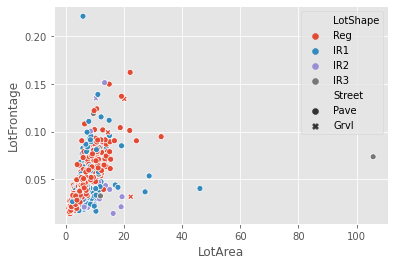

In [30]:
#LotFrontage
lotlist = ['LotFrontage', 'LotArea', 'LotShape', 'Street']
housing.loc[housing['LotFrontage'].isnull(), lotlist]

# See relationship between LotFront and Lot Area
normlot=housing[lotlist]
#normlot = housing[lotlist].dropna()
#normlot = normlot.loc[normlot[['LotFrontage', 'LotArea']].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.scatterplot(data=normlot, x='LotArea', y='LotFrontage', hue='LotShape', style='Street')

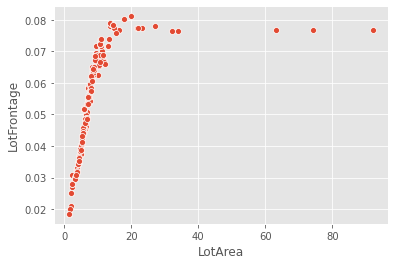

In [31]:
# LotFrontage appears to be Missing at Random (MAR) so use kNN imputation
# Sqrt(1200) is about 35, so use that for K, which will also be robust to outliers (which is present)
imputer = KNNImputer(n_neighbors=35)
lotlist = ['LotFrontage', 'LotArea']
imputedvals = pd.DataFrame(imputer.fit_transform(housing[lotlist]), columns=lotlist)
sns.scatterplot(data=imputedvals.loc[housing['LotFrontage'].isnull(), lotlist], x='LotArea', y='LotFrontage')
# Most of the data imputation <50000 LotArea makese sense but there are a few outliers for larger LotArea. This is fine for now
# because we will deal with outliers later.
housing['LotFrontage'] = imputedvals['LotFrontage']

In [32]:
garagelist = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual']
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].shape)
print(housing.loc[housing['GarageYrBlt'].isnull(), garagelist]['GarageType'].value_counts())
# Easy one to solve, GarageYrBlt is not missing at random, it is because there is no Garage. Impute with zeros
housing['GarageYrBlt'].fillna(0,inplace=True)

(81,)
N    81
Name: GarageType, dtype: int64


In [33]:
# Check for missing values in total dataset again
housing.isna().sum().sum()

0

**Excellent! we have dealt with all missing values.**

## Before any feature selecting try Lasso regression to see what results can be obtained

In [34]:
# Define function to run Lasso to check scores
def run_lasso(housing):
    # Re-run summary for categorical vs numerical features
    summarydf = summarise_data(housing, 'SalePrice')
    mask = summarydf.VariableType == 'categorical'
    categorical_vars = list(summarydf.loc[mask, 'Predictor'])
    mask = summarydf.VariableType == 'numerical'
    numerical_vars = list(summarydf.loc[mask, 'Predictor'])
    # Redo target variable in case data points/outliers were dropped
    target = housing.Pricepersqft
    # Remove predictor and unnecessary variables
    dropvar = ['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea']
    for v in dropvar:
        numerical_vars.remove(v)
    features = housing.drop(dropvar, axis=1)
    # Use one-hot encoding of categorical variables
    onehothousing = pd.get_dummies(features, columns=categorical_vars, prefix=categorical_vars, drop_first=True)
        
    # Train Test split
    X_train, X_test, y_train, y_test = train_test_split(onehothousing, target, test_size=0.3, random_state=28)
    
    # Lasso model using 10fold CV and grid search
    lasso = Lasso()
    lasso.set_params(normalize=False)
    grid_para_lasso = {'alpha': np.arange(0,1,0.05)}
    grid_search_lasso = ms.GridSearchCV(lasso, grid_para_lasso, cv=10, scoring='r2').fit(X_train, y_train)
    print('The best score is %.4f' %grid_search_lasso.best_score_)
    print('The training error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_train, y_train)))
    print('The testing error is %.4f' %(1 - grid_search_lasso.best_estimator_.score(X_test, y_test)))

In [35]:
# Check scores before feature engineering
run_lasso(housing)

The best score is 0.7879
The training error is 0.1499
The testing error is 0.2842


In [36]:
# As expected, low training error vs test error to indicate overfitting due to the large amount of variables that 
# are correlated.

## Feature Engineering
1. Check features identified to have outliers and remove obvious ones
2. Consider transformations when it appears that feature is skewed or has many outliers

In [37]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('NumOutliers', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
68,EnclosedPorch,1460,0,1460,0.0,numerical,0,3.078536,-0.240165,208
36,BsmtFinSF2,1460,0,1460,0.0,numerical,0,4.209654,0.005284,167
18,OverallCond,1460,0,1460,0.0,numerical,0,0.692355,0.002643,125
62,GarageArea,1460,0,1460,0.0,numerical,0,0.629797,0.546614,119
70,ScreenPorch,1460,0,1460,0.0,numerical,0,4.245385,0.021257,116
48,BsmtHalfBath,1460,0,1460,0.0,numerical,0,4.099186,0.011053,82
59,GarageYrBlt,1460,0,1460,0.0,numerical,0,-3.865524,0.513072,81
67,OpenPorchSF,1460,0,1460,0.0,numerical,0,4.334900,0.198047,80
26,MasVnrArea,1460,0,1460,0.0,numerical,0,2.481626,0.234209,76
52,KitchenAbvGr,1460,0,1460,0.0,numerical,0,4.483784,-0.294224,68


### Explore porch-related variables

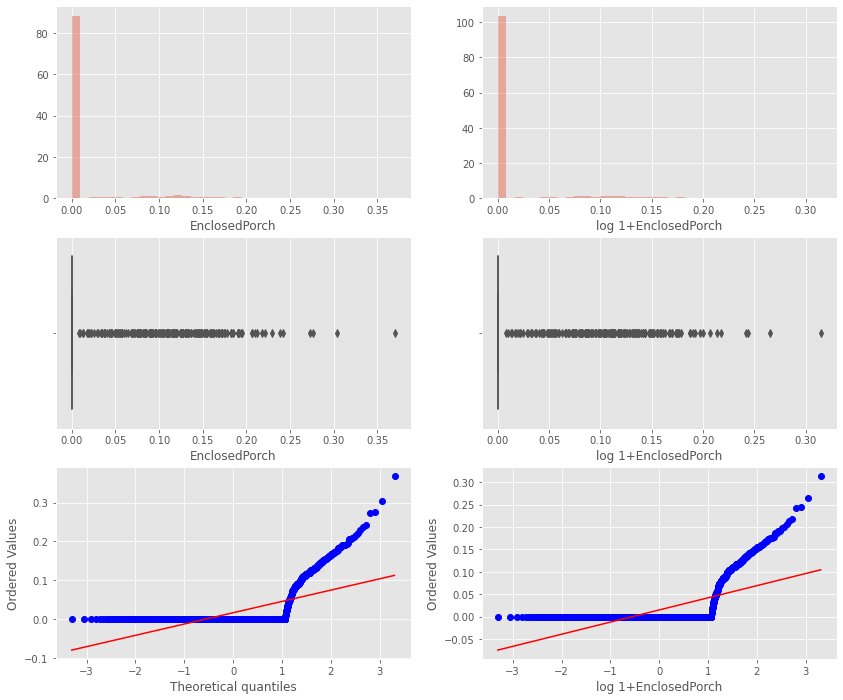

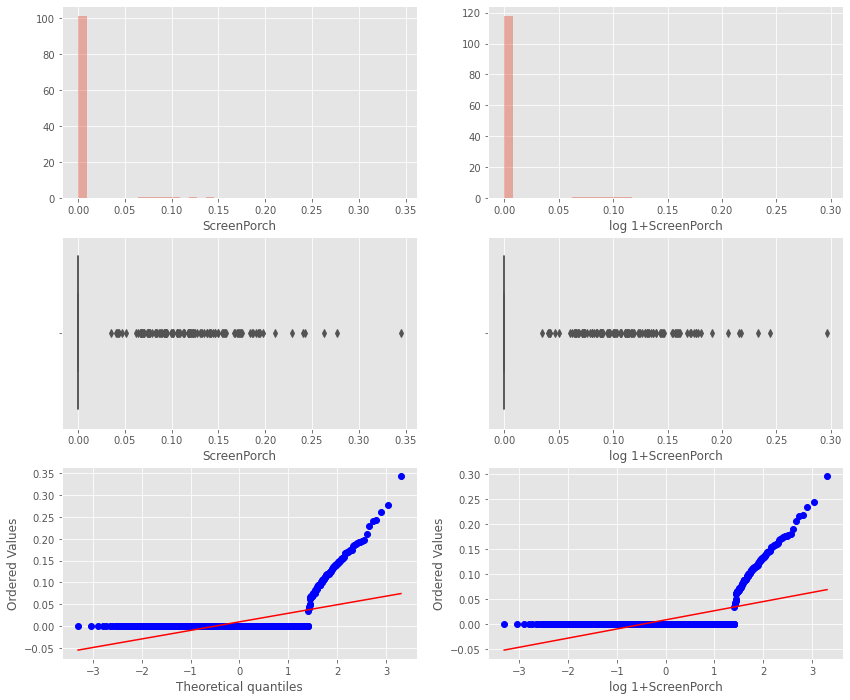

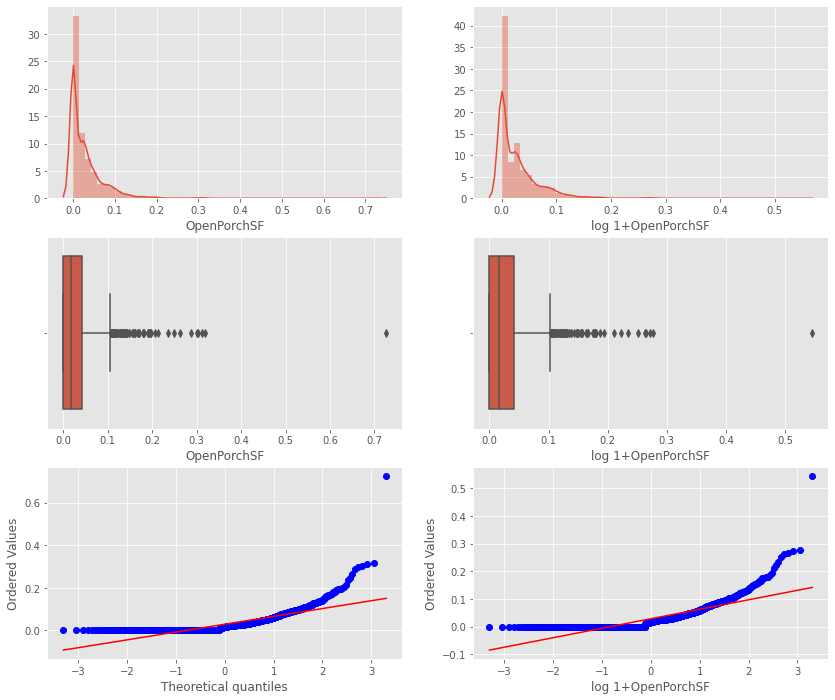

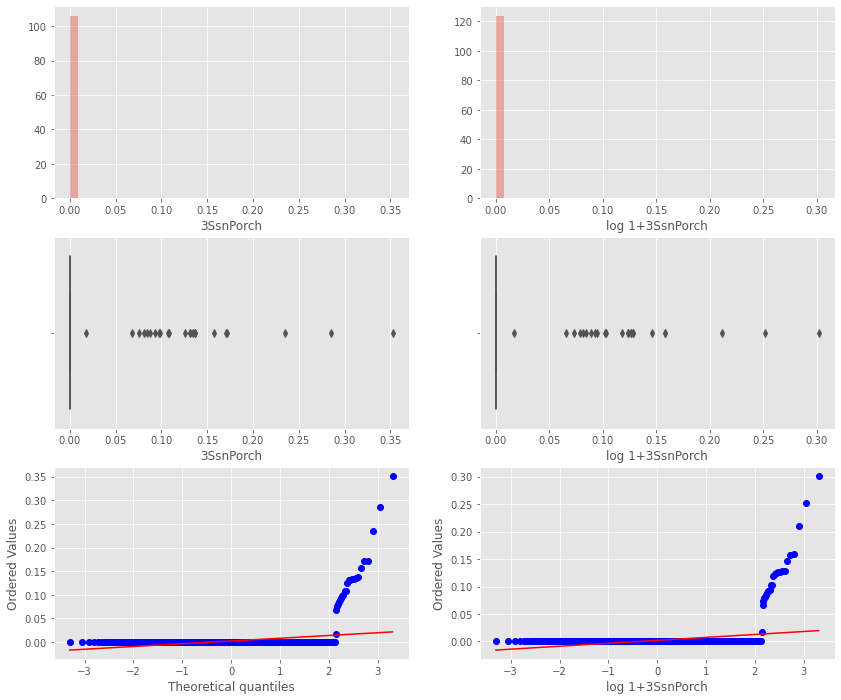

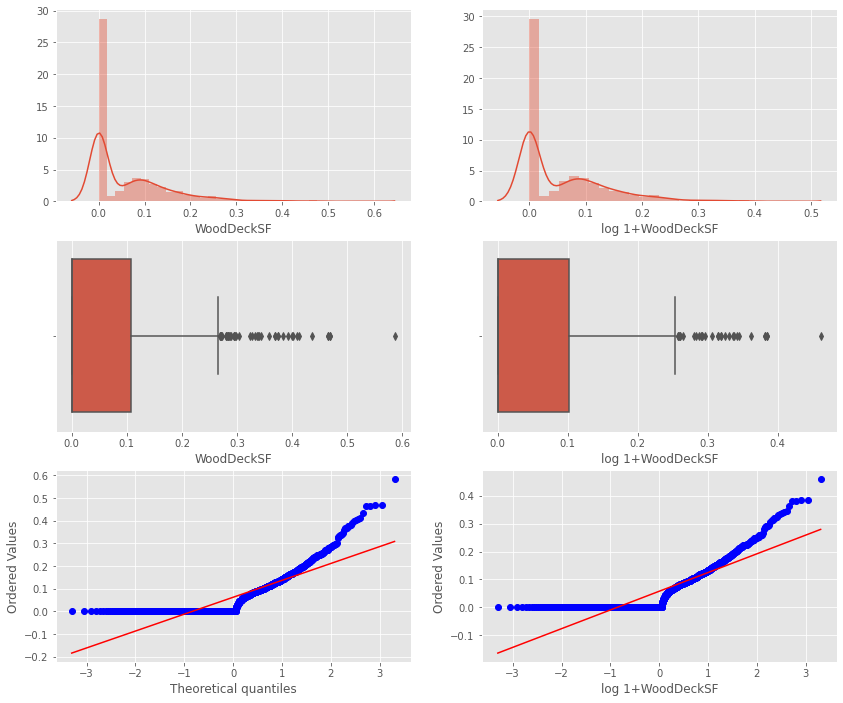

In [38]:
chart_singlevar_dist(housing, 'EnclosedPorch')
chart_singlevar_dist(housing, 'ScreenPorch')
chart_singlevar_dist(housing, 'OpenPorchSF')
chart_singlevar_dist(housing, '3SsnPorch')
chart_singlevar_dist(housing, 'WoodDeckSF')
# All of these variables are imbalanced due to many zeros which represent lack of feature. Consider making these categorical variables

In [39]:
def priceplots(var, bins):
    """
    Scatterplot of relevant porch variable against SalePrice with and without bins. Only filters for non-zero
    values of porch variable and shows 2 charts, one without bins and one with bins. This helps to identify
    cut-off values of porch variable to convert numeric feature into categorical feature
    """
    fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', ax=ax[0])
    sns.regplot(data=housing[(housing[var]!=0)], x=var, y='Pricepersqft', x_bins=bins, ax=ax[1])
    ax[0].set(xlabel = var + ' (non-zero values)', title='No Bins')
    ax[1].set(xlabel = var + ' (non-zero values)', title='With Bins')

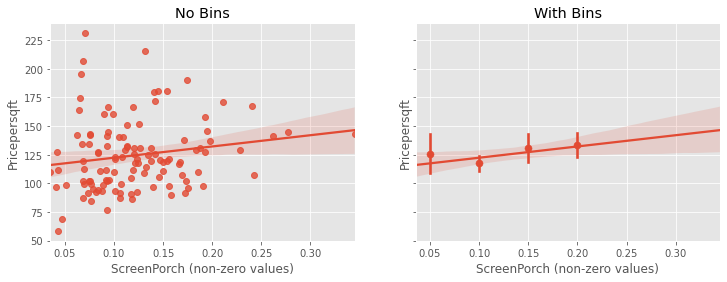

In [40]:
# Plot screenporch scatter charts    
priceplots('ScreenPorch',[0.05,0.10,0.15,0.20])
# It appears that 0.075, 0.125 are good cut-off values

In [41]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.075:
        return '0to075'
    elif val > 0.075 and val <= 0.125:
        return '075to125'
    elif val > 0.125:
        return '0125plus'
housing['ScreenPorch'] = housing['ScreenPorch'].apply(categorize)
housing['ScreenPorch'].value_counts()

N           1344
075to125      49
0125plus      45
0to075        22
Name: ScreenPorch, dtype: int64

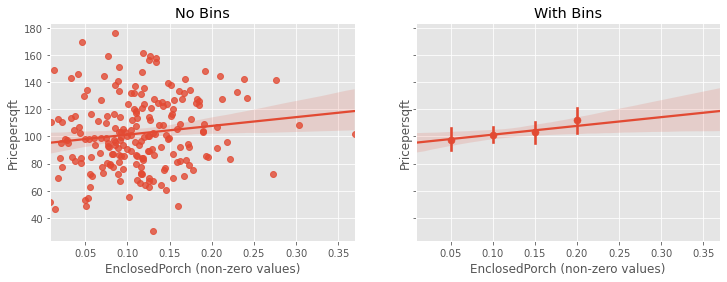

In [42]:
# Plot EnclosedPorch scatter charts    
priceplots('EnclosedPorch',[0.05,0.10,0.15,0.20])
# It appears that 0.15 is a good cut-off value

In [43]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.15:
        return '0to150'
    elif val > 0.15:
        return '150plus'
housing['EnclosedPorch'] = housing['EnclosedPorch'].apply(categorize)
housing['EnclosedPorch'].value_counts()

N          1252
0to150      160
150plus      48
Name: EnclosedPorch, dtype: int64

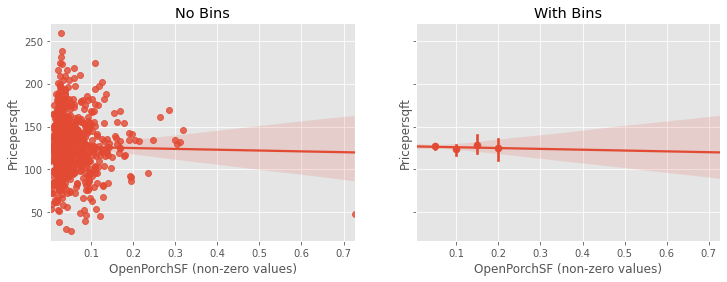

In [44]:
# Plot OpenPorchSF scatter charts    
priceplots('OpenPorchSF',[0.05,0.10,0.15,0.20])
# Can't gauge cut-off value due to outlier

In [45]:
# Outlier also has abnormal sale condition, drop record
housing.loc[housing.OpenPorchSF > 0.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft
495,496,30,C (all),0.083333,10.943056,Pave,N,Reg,Lvl,AllPub,...,N,GdWo,N,0,11,2009,WD,Abnorml,34900,48.472222


In [46]:
# Drop outlier
dropindex = housing[housing.OpenPorchSF > 0.5].index
housing.drop(dropindex, axis=0, inplace=True)

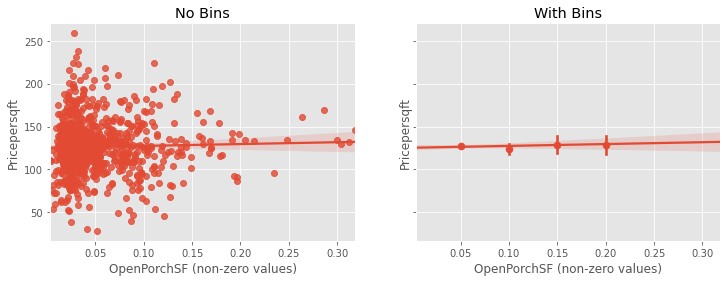

In [47]:
# Plot OpenPorchSF scatter charts    
priceplots('OpenPorchSF',[0.05,0.10,0.15,0.20])
# It appears that 0.15 is a good cut-off value

In [48]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    elif val > 0 and val <= 0.15:
        return '0to150'
    elif val > 0.15:
        return '150plus'
housing['OpenPorchSF'] = housing['OpenPorchSF'].apply(categorize)
housing['OpenPorchSF'].value_counts()

0to150     774
N          656
150plus     29
Name: OpenPorchSF, dtype: int64

In [49]:
# Rename OpenPorchSF variable to remove SF
housing.rename(columns={'OpenPorchSF': 'OpenPorch'}, inplace=True)

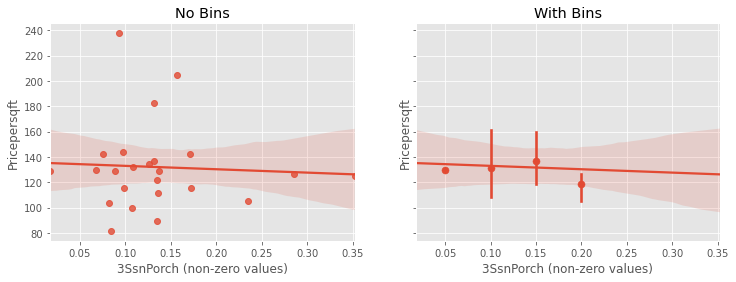

In [50]:
# Plot 3SsnPorch scatter charts    
priceplots('3SsnPorch',[0.05,0.10,0.15,0.20])
# No need for cut-off value
# R2 is 0.015 and after dummification, it's 0.018. No value to keeping this very sparse variable so drop it
housing.drop('3SsnPorch', axis=1, inplace=True)

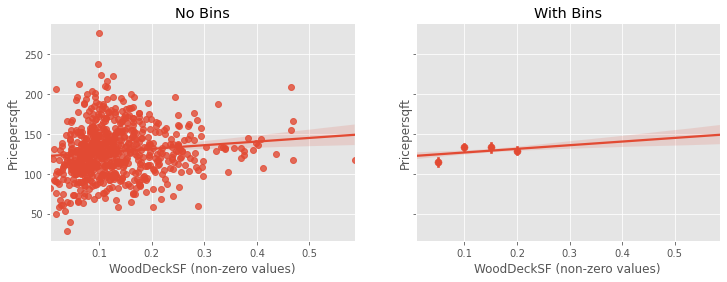

In [51]:
# Plot WoodDeckSF scatter charts    
priceplots('WoodDeckSF',[0.05,0.10,0.15,0.20])
# It appears that no cut-off value is required.
# R2 is 0.387 and after dummification it's 0.506. Hence dummification increases explain without introducing
# and additional dimension.

In [52]:
# Drop outlier
dropindex = housing[housing.WoodDeckSF > 0.5].index
housing.drop(dropindex, axis=0, inplace=True)

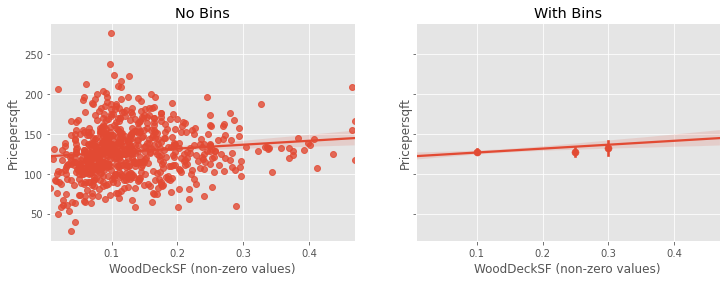

In [53]:
# Plot WoodDeckSF scatter charts    
priceplots('WoodDeckSF',[0.10,0.25,0.30])
# It appears that no cut-off value is required.
# R2 is 0.387 and after dummification it's 0.506. Hence dummification increases explain without introducing
# and additional dimension.

In [54]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 0:
        return 'N'
    else:
        return 'Y'
housing['WoodDeckSF'] = housing['WoodDeckSF'].apply(categorize)
housing['WoodDeckSF'].value_counts()

N    760
Y    698
Name: WoodDeckSF, dtype: int64

In [55]:
# Rename WoodDeckSF to WoodDeck
housing.rename(columns={'WoodDeckSF': 'WoodDeck'}, inplace=True)

In [56]:
# Variables with Outliers ranked by number of identified
summarydf = summarise_data(housing, 'Pricepersqft')
mask = (np.abs(summarydf.NumOutliers) !=0) & (summarydf.VariableType == 'numerical')
outlier_vars = list(summarydf.loc[mask, 'Predictor'])
summarydf.loc[mask, :].sort_values('Skewness', ascending=False)

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
74,MiscVal,1458,0,1458,0.0,numerical,0,24.434913,-0.060021,52
70,PoolArea,1458,0,1458,0.0,numerical,0,19.773339,-0.005777,7
45,LowQualFinSF,1458,0,1458,0.0,numerical,0,9.721175,-0.153241,26
4,LotArea,1458,0,1458,0.0,numerical,0,9.585169,0.237949,64
52,KitchenAbvGr,1458,0,1458,0.0,numerical,0,4.480268,-0.294840,68
36,BsmtFinSF2,1458,0,1458,0.0,numerical,0,4.218199,0.005057,166
48,BsmtHalfBath,1458,0,1458,0.0,numerical,0,4.095895,0.010751,82
26,MasVnrArea,1458,0,1458,0.0,numerical,0,2.479606,0.233584,76
79,SalePrice,1458,0,1458,0.0,numerical,0,1.886221,0.485903,61
46,GrLivArea,1458,0,1458,0.0,numerical,0,1.366121,-0.165689,31


### Explore Misc. variables

In [57]:
housing.MiscFeature.value_counts()

N       1404
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [58]:
housing[housing.MiscFeature == 'TenC']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft
1386,1387,60,RL,0.028736,5.99569,Pave,N,IR1,Lvl,AllPub,...,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000,89.798851


In [59]:
housing[housing.MiscFeature == 'Shed']['MiscVal'].describe()

count      49.000000
mean      697.836735
std       512.853266
min         0.000000
25%       400.000000
50%       500.000000
75%       700.000000
max      2500.000000
Name: MiscVal, dtype: float64

In [60]:
# Remove data points for Tennis Court, Garage2, and Other 2 since not enough data to make any meaningful conclusions
# Dummify variable to indicate shed or no shed
# Drop MiscVal variable since not really interested in value of shed
dropindex = housing[(housing.MiscFeature == 'TenC') | (housing.MiscFeature == 'Othr') | (housing.MiscFeature == 'Gar2')].index
housing.drop(dropindex, axis=0, inplace=True)

In [61]:
# Rename MiscFeature to Shed 
housing.rename(columns={'MiscFeature': 'Shed'}, inplace=True)

In [62]:
housing['Shed'].value_counts()

N       1404
Shed      49
Name: Shed, dtype: int64

In [63]:
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Shed':
        return 'Y'
    else: return 'N'
housing['Shed'] = housing['Shed'].apply(categorize)
housing['Shed'].value_counts()

N    1404
Y      49
Name: Shed, dtype: int64

In [64]:
# Drop MiscVal and MiscFeature
housing.drop('MiscVal',axis=1, inplace=True)

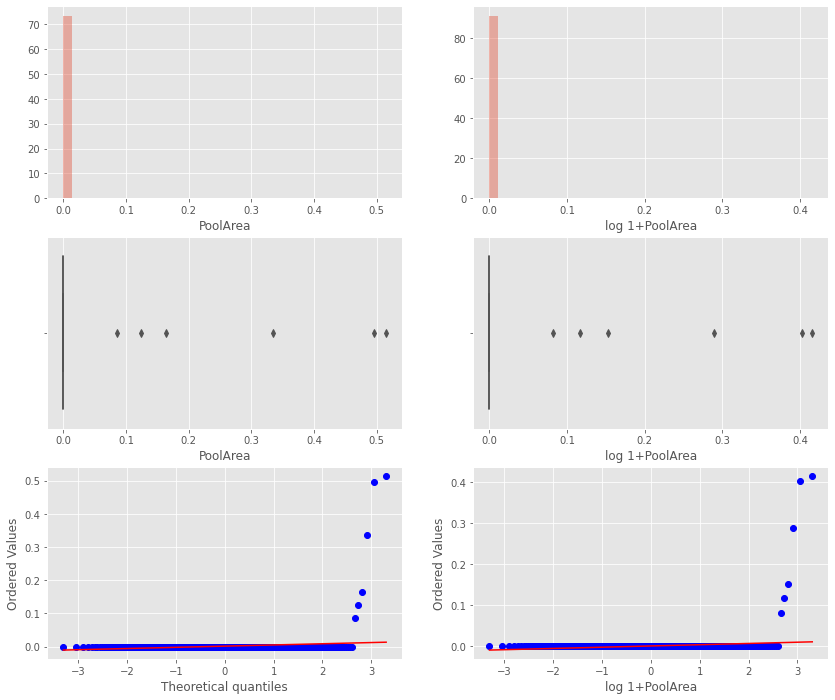

In [65]:
# Pool Area
chart_singlevar_dist(housing, 'PoolArea')

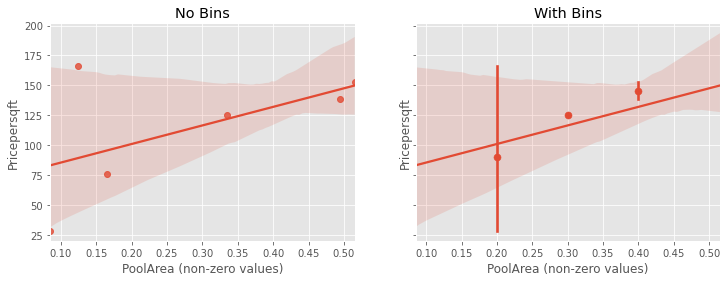

In [66]:
# Plot PoolArea scatter charts    
priceplots('PoolArea',[0.2,0.3,0.4])
# Only 6 datapoints out of >1400 so drop Pool variables since may not be able to make meaningful predictions

In [67]:
# Drop Pool feature
housing.drop('PoolArea',axis=1, inplace=True)
housing.drop('PoolQC',axis=1, inplace=True)

## Dealing with outliers

In [68]:
housing[housing.LotArea > 20]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,ScreenPorch,Fence,Shed,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft
53,54,20,RL,0.036916,27.291531,Pave,N,IR1,Low,AllPub,...,N,N,N,N,11,2006,WD,Normal,385000,209.011944
120,121,80,RL,0.077390,21.713563,Pave,N,IR1,Low,AllPub,...,N,N,N,N,10,2006,WD,Normal,180000,182.186235
249,250,50,RL,0.076894,74.160448,Pave,N,IR2,Low,AllPub,...,N,N,N,Y,6,2007,WD,Normal,277000,129.197761
271,272,20,RL,0.053558,28.689655,Pave,N,IR1,Low,AllPub,...,N,N,N,N,4,2008,WD,Normal,241500,177.182685
277,278,20,RL,0.162037,22.150463,Pave,N,Reg,Lvl,AllPub,...,N,N,N,N,6,2010,WD,Normal,141000,163.194444
313,314,20,RL,0.073674,105.719548,Pave,N,IR3,Low,AllPub,...,N,N,N,N,6,2009,WD,Normal,375000,184.184676
335,336,190,RL,0.076894,92.194849,Grvl,N,IR1,HLS,AllPub,...,N,N,N,Y,8,2008,WD,Normal,228950,128.191489
384,385,60,RL,0.078049,27.192524,Pave,N,IR2,Low,AllPub,...,N,N,N,N,6,2007,WD,Normal,240000,122.887865
411,412,190,RL,0.094697,32.812500,Pave,N,Reg,Bnk,AllPub,...,N,N,N,N,1,2006,WD,Normal,145000,137.310606
422,423,20,RL,0.101215,22.014170,Pave,N,Reg,HLS,AllPub,...,N,N,N,N,2,2008,WD,Normal,113000,114.372470


In [69]:
# Drop records with Lot sizes that are greater than 20 times the house size since these are likely special cases
# In addition, only 20 records out of >1400 so still materially small size
dropindex = housing[housing.LotArea > 20].index
housing.drop(dropindex, axis=0, inplace=True)

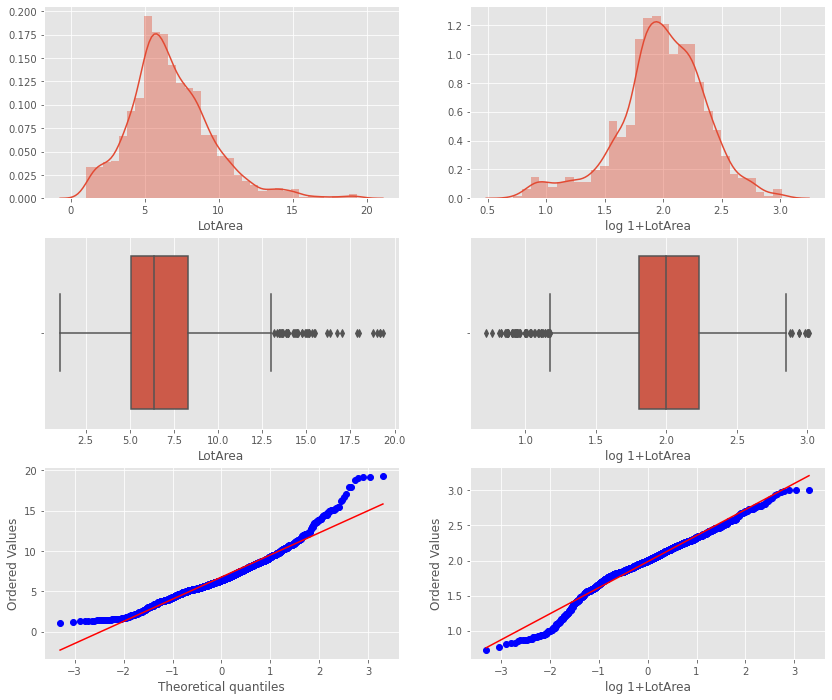

In [70]:
# Lot Area
chart_singlevar_dist(housing, 'LotArea')

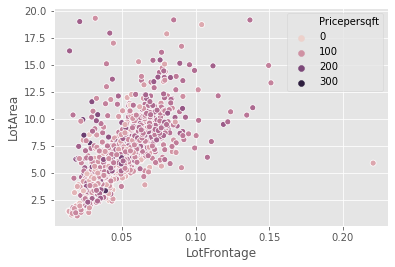

In [71]:
sns.scatterplot(data=housing, x='LotFrontage', y='LotArea', hue='Pricepersqft')

In [72]:
# LotArea and LotFrontage have a relationship so drop LotFrontage since what really matters is LotSize
housing.drop('LotFrontage', axis=1, inplace=True)

In [73]:
# Make LotShape binary Regular or Irregular
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Reg':
        return 'Reg'
    else: return 'Irreg'
housing['LotShape'] = housing['LotShape'].apply(categorize)
housing['LotShape'].value_counts()

Reg      914
Irreg    519
Name: LotShape, dtype: int64

In [74]:
housing.Street.value_counts()

Pave    1430
Grvl       3
Name: Street, dtype: int64

In [75]:
# Drop street feature since only 3 values with gravel and not important feature from initial indications
housing.drop('Street', axis=1, inplace=True)

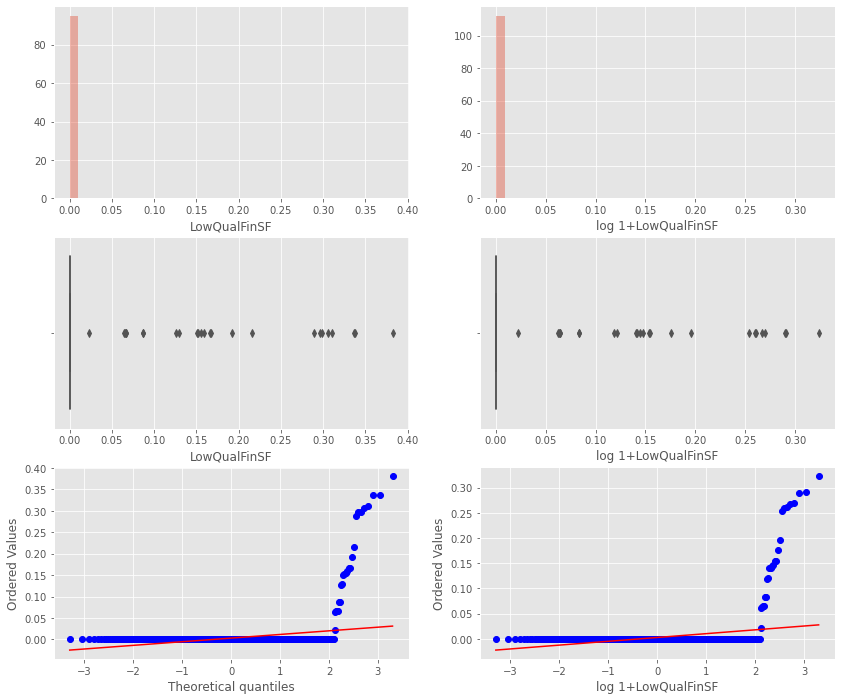

In [76]:
# LowQualFinSF
chart_singlevar_dist(housing, 'LowQualFinSF')

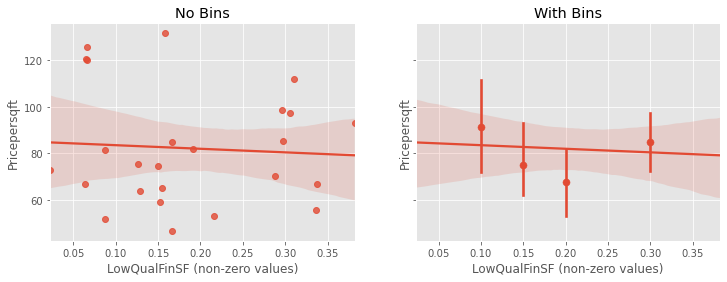

In [77]:
# Plot LowQualFinSF scatter charts    
priceplots('LowQualFinSF',[0.1,0.15,0.2,0.25,0.3])
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature

In [78]:
# Only 24 datapoints so very sparse variable, information likely to be captured in OverallQuality - so drop feature
# since sparsity doesn't help create any meaningful information
housing.drop('LowQualFinSF', axis=1, inplace=True)

In [79]:
basevar = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
housing[basevar]

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,0.500585,0.412865,0.000000,0.087719
1,1.000000,0.774960,0.000000,0.225040
2,0.515118,0.272116,0.000000,0.243001
3,0.440303,0.125801,0.000000,0.314502
4,0.520928,0.297998,0.000000,0.222930
...,...,...,...,...
1454,1.000000,0.335790,0.000000,0.664210
1455,0.578628,0.000000,0.000000,0.578628
1456,0.743849,0.381090,0.078630,0.284129
1457,0.492308,0.117521,0.000000,0.374786


In [80]:
# Drop BsmtFinSF1 and 2 since duplicate information leading to perfect multicollinearity. Also drop FinType1 and FinType2
# More important to distinguish between Total basement size and how much is unfinished.
housing.drop('BsmtFinSF1', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('BsmtFinType1', axis=1, inplace=True)
housing.drop('BsmtFinType2', axis=1, inplace=True)

In [81]:
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure']
for var in basevar:
    print(housing[var].value_counts())

TA    633
Gd    609
Ex    120
N      36
Fa     35
Name: BsmtQual, dtype: int64
TA    1285
Gd      65
Fa      45
N       36
Po       2
Name: BsmtCond, dtype: int64
No    944
Av    217
Gd    123
Mn    112
N      37
Name: BsmtExposure, dtype: int64


In [82]:
# Data error with BsmtExposure since have 37 with no basement vs 36 from other 2 variables
basevar = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF']
housing.loc[(housing.BsmtExposure == 'N') & (housing.BsmtCond != 'N'),'BsmtExposure'] = 'No'

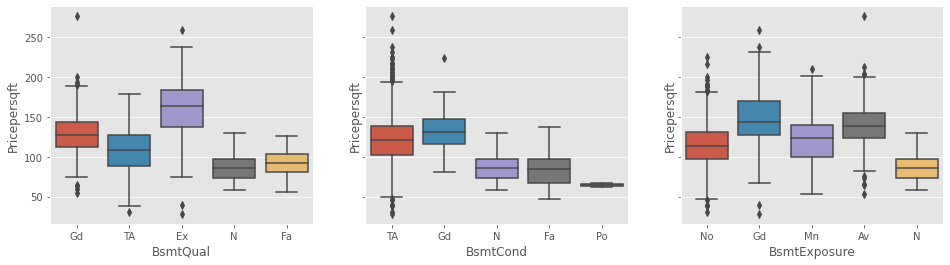

In [83]:
# Basement variables
fig, ax = plt.subplots(figsize=(16, 4), ncols=3, sharex=False, sharey=True)
sns.boxplot(data=housing, x='BsmtQual', y='Pricepersqft', ax=ax[0])
sns.boxplot(data=housing, x='BsmtCond', y='Pricepersqft', ax=ax[1])
sns.boxplot(data=housing, x='BsmtExposure', y='Pricepersqft', ax=ax[2])

In [84]:
# Consolidate basement quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Gd':
        return 'TA'
    else: return val
housing['BsmtQual'] = housing['BsmtQual'].apply(categorize)
housing['BsmtQual'].value_counts()

TA    1242
Ex     120
N       71
Name: BsmtQual, dtype: int64

In [85]:
def run_mlr(varlis):
    """
    Function to run all combinations of linear regressions of given list of variables varlis
    """
    for var in varlis:
        target = housing.Pricepersqft
        if housing[var].dtype == 'object':
            x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
        else: x = housing[var]
        model = sm.OLS(target, x)
        results = model.fit()
        print(results.summary())
    x = pd.get_dummies(housing[varlis], columns=varlis, prefix=varlis, drop_first=True)
    model = sm.OLS(target, x)
    results = model.fit()
    print(results.summary())

In [86]:
var = ['BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                              2153.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                   1.13e-287
Time:                        00:08:53   Log-Likelihood:                         -8287.7
No. Observations:                1433   AIC:                                  1.658e+04
Df Residuals:                    1432   BIC:                                  1.658e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                            OLS Regression Results                            
Dep. Variable:           Pricepersqft   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2.276
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           1.14e-11
Time:                        00:08:57   Log-Likelihood:                -4973.0
No. Observations:                1433   AIC:                         1.244e+04
Df Residuals:                     188   BIC:                         1.899e+04
Df Model:                        1244                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
BsmtUnfSF_

In [87]:
basevar = ['BsmtCond', 'BsmtExposure']
housing.drop(basevar, axis=1, inplace=True)

In [88]:
# BsmtCond and BsmtExposure sound like important variables but what really matters is size, quality and 
# how much is still unfinished.

In [89]:
#Explore Garage features
grgvar = ['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']
housing[grgvar]

,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
0,Attchd,RFn,2,0.320468,TA,TA,Y
1,Attchd,RFn,2,0.364501,TA,TA,Y
2,Attchd,RFn,2,0.340426,TA,TA,Y
3,Detchd,Unf,3,0.373908,TA,TA,Y
4,Attchd,RFn,3,0.380346,TA,TA,Y
...,...,...,...,...,...,...,...
1454,Attchd,RFn,2,0.327600,TA,TA,Y
1455,Attchd,RFn,2,0.279296,TA,TA,Y
1456,Attchd,Unf,2,0.241196,TA,TA,Y
1457,Attchd,RFn,1,0.107692,TA,TA,Y


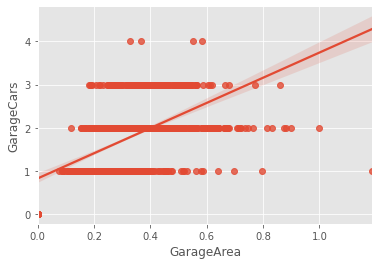

In [90]:
sns.regplot(data=housing, x='GarageArea', y='GarageCars')

In [91]:
# Drop GarageArea because information contained in GarageCars. People measure garages in number of cars more than area.
housing.drop('GarageArea', axis=1, inplace=True)

In [92]:
grgvar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
for var in grgvar:
    print(housing[var].value_counts())

Attchd     851
Detchd     384
BuiltIn     87
N           79
Basment     19
CarPort      9
2Types       4
Name: GarageType, dtype: int64
Unf    595
RFn    415
Fin    344
N       79
Name: GarageFinish, dtype: int64
TA    1286
N       79
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1301
N       79
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Y    1320
N      84
P      29
Name: PavedDrive, dtype: int64


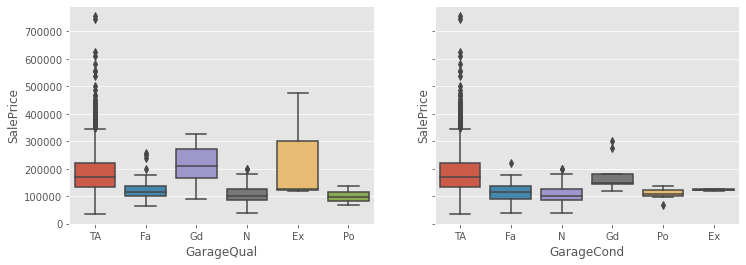

In [93]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=2, sharex=False, sharey=True)
sns.boxplot(data=housing, x='GarageQual', y='SalePrice', ax=ax[0])
sns.boxplot(data=housing, x='GarageCond', y='SalePrice', ax=ax[1])

In [94]:
# Consolidate GarageCond into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageCond'] = housing['GarageCond'].apply(categorize)
housing['GarageCond'].value_counts()

TA    1301
N      121
Gd      11
Name: GarageCond, dtype: int64

In [95]:
# Consolidate garage quality into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'N'
    if val == 'Po':
        return 'N'
    if val == 'Ex':
        return 'Gd'
    else: return val
housing['GarageQual'] = housing['GarageQual'].apply(categorize)
housing['GarageQual'].value_counts()

TA    1286
N      130
Gd      17
Name: GarageQual, dtype: int64

In [96]:
# Consolidate garage type into 3 catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'N':
        return 'Other'
    if val == 'Basment':
        return 'Other'
    if val == 'CarPort':
        return 'Other'
    if val == '2Types':
        return 'Other'
    else: return val
housing['GarageType'] = housing['GarageType'].apply(categorize)
housing['GarageType'].value_counts()

Attchd     851
Detchd     384
Other      111
BuiltIn     87
Name: GarageType, dtype: int64

In [97]:
var = ['GarageQual', 'GarageCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              9465.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:08:58   Log-Likelihood:                         -7042.8
No. Observations:                1433   AIC:                                  1.409e+04
Df Residuals:                    1431   BIC:                                  1.410e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [98]:
# Both are good predictors at 94% and including both creates multicollinearity for no increase in explain.
# Drop Garage quality, because some will be captured in Overall quality and current condition is probably what matters.
housing.drop('GarageQual', axis=1, inplace=True)

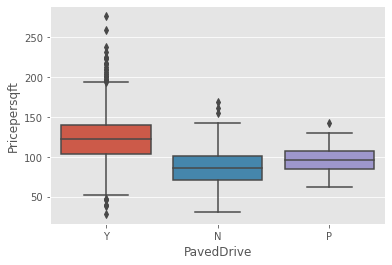

In [99]:
# Check difference between partial or no paved driveways
sns.boxplot(data=housing, x='PavedDrive', y='Pricepersqft')

In [100]:
var = ['PavedDrive']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
target = housing.Pricepersqft
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              7401.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:08:58   Log-Likelihood:                         -7205.1
No. Observations:                1433   AIC:                                  1.441e+04
Df Residuals:                    1431   BIC:                                  1.442e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [101]:
bedvar = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath']
housing[bedvar]

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath
0,0.500585,0.499415,1710,2,1
1,1.000000,0.000000,1262,2,0
2,0.515118,0.484882,1786,2,1
3,0.559697,0.440303,1717,1,0
4,0.520928,0.479072,2198,2,1
...,...,...,...,...,...
1454,1.000000,0.000000,1221,2,0
1455,0.578628,0.421372,1647,2,1
1456,1.000000,0.000000,2073,2,0
1457,0.507692,0.492308,2340,2,0


In [102]:
# Drop 1stFlrSF since info already contained in GrLivingArea 
housing.drop('1stFlrSF', axis=1, inplace=True)

In [103]:
# Total rooms above grade does not include bathrooms but includes basement bedrooms and other living rooms
# Create a new variable as difference between TotRmsAbvGrd less BedroomAbvGr less KitchenAbvGr
housing['OtherRmsAbvGrd'] = housing['TotRmsAbvGrd'] - housing['BedroomAbvGr']
# Check no negative rooms!
housing[housing['OtherRmsAbvGrd'] < 0]

,Id,MSSubClass,MSZoning,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,Fence,Shed,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd


In [104]:
var = ['OtherRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'FullBath', 'HalfBath']
x = housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              7614.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:08:58   Log-Likelihood:                         -7624.6
No. Observations:                1433   AIC:                                  1.525e+04
Df Residuals:                    1432   BIC:                                  1.526e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [105]:
# All room variables are statistically significant except Halfbath
housing.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [106]:
# Fireplace, heating, electrical, central air
var = ['Fireplaces', 'FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
housing[var]
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.480
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              1321.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                   1.92e-205
Time:                        00:08:58   Log-Likelihood:                         -8477.0
No. Observations:                1433   AIC:                                  1.696e+04
Df Residuals:                    1432   BIC:                                  1.696e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [107]:
var = ['FireplaceQu', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
for v in var:
       print(housing[v].value_counts())

N     679
Gd    375
TA    303
Fa     32
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
GasA     1402
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Ex    732
TA    418
Gd    235
Fa     47
Po      1
Name: HeatingQC, dtype: int64
Y    1341
N      92
Name: CentralAir, dtype: int64
SBrkr    1309
FuseA      92
FuseF      27
FuseP       3
Mix         2
Name: Electrical, dtype: int64


In [108]:
# Heating, CentralAir and Electrical will be too sparse after dummification and removing the category with largest values
# Drop those variables
var = ['Heating', 'CentralAir', 'Electrical']
housing.drop(var, axis=1, inplace=True)

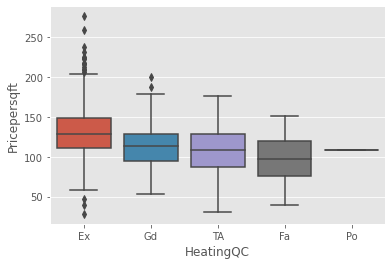

In [109]:
# Consolidate poor heating
sns.boxplot(data=housing, x='HeatingQC', y='Pricepersqft')

In [110]:
# Consolidate HeatingQC Fair and Poor into Avg/Typical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'TA'
    if val == 'Fa':
        return 'TA'
    else: return val
housing['HeatingQC'] = housing['HeatingQC'].apply(categorize)
housing['HeatingQC'].value_counts()

Ex    732
TA    466
Gd    235
Name: HeatingQC, dtype: int64

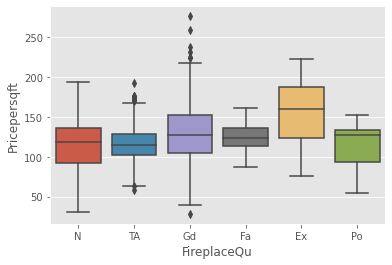

In [111]:
# Electrical appears to not be statistically significant feature
sns.boxplot(data=housing, x='FireplaceQu', y='Pricepersqft')

In [112]:
# Simplify FireplaceQu to consolidate N, TA, Fa and Po
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'N'
    if val == 'TA':
        return 'N'
    if val == 'Fa':
        return 'N'
    else: return val
housing['FireplaceQu'] = housing['FireplaceQu'].apply(categorize)
housing['FireplaceQu'].value_counts()

N     1034
Gd     375
Ex      24
Name: FireplaceQu, dtype: int64

In [113]:
# Look at Yearbuilt, Year remodel added, YearGaragebuilt
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
run_mlr(var)


                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.291e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:08:59   Log-Likelihood:                         -6915.3
No. Observations:                1433   AIC:                                  1.383e+04
Df Residuals:                    1432   BIC:                                  1.384e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

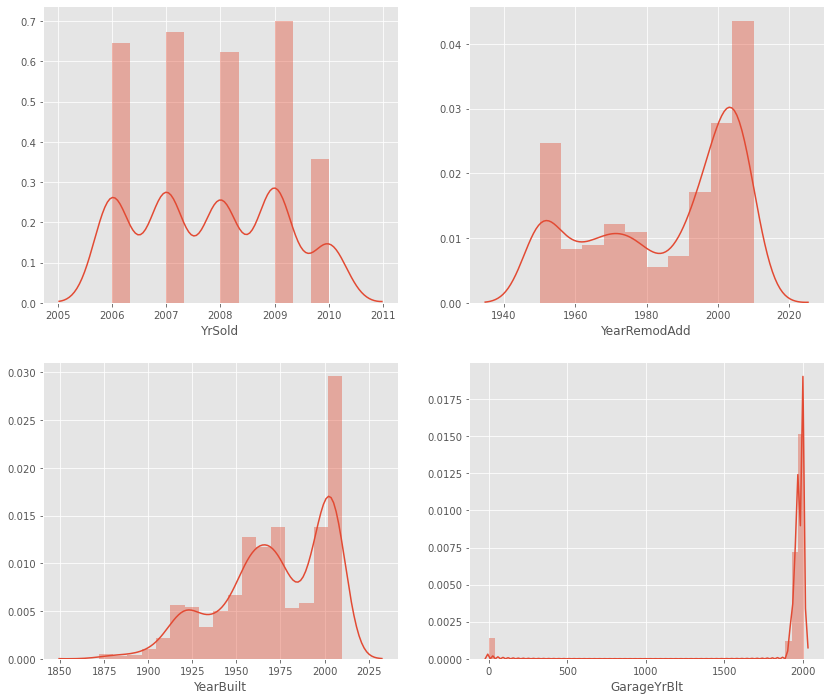

In [114]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [115]:
# GarageYrBlt zeros are creating a problem, if zero then impute them to be the Yearbuilt
housing.loc[housing['GarageYrBlt'] == 0, 'GarageYrBlt'] = housing.loc[housing['GarageYrBlt'] == 0, 'YearBuilt']

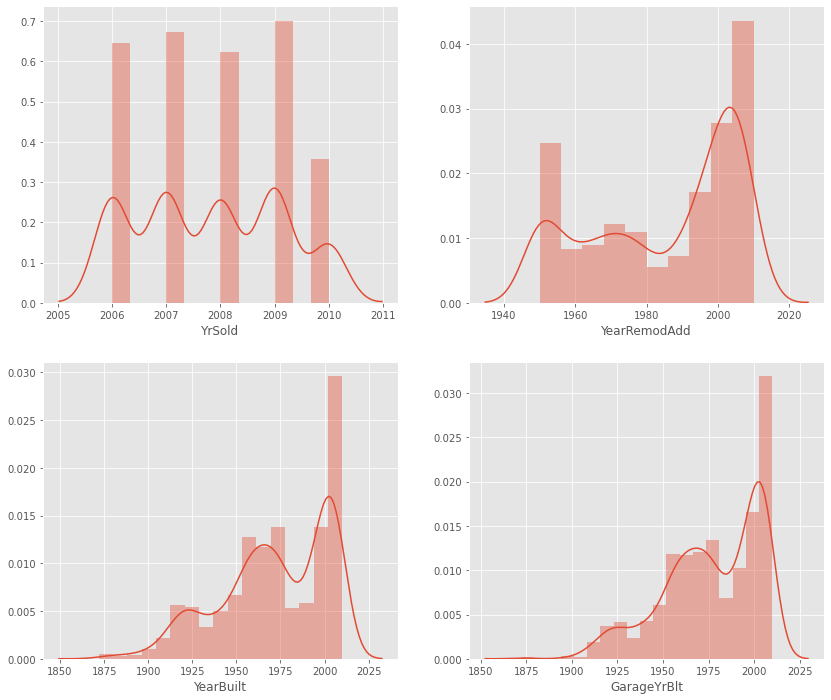

In [116]:
fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=2, sharex=False, sharey=False)
sns.distplot(housing['YrSold'], ax=ax[0,0])
sns.distplot(housing['YearBuilt'], ax=ax[1,0])
sns.distplot(housing['YearRemodAdd'], ax=ax[0,1])
sns.distplot(housing['GarageYrBlt'], ax=ax[1,1])

In [117]:
# Convert year variables into age for benefits of standardisation and interpretability
housing['HouseAge'] = housing['YrSold'] - housing['YearBuilt']
housing['RemodAge'] = housing['YrSold'] - housing['YearRemodAdd']
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']

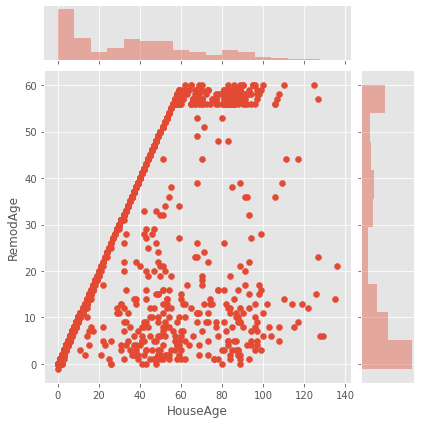

In [118]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['RemodAge'])

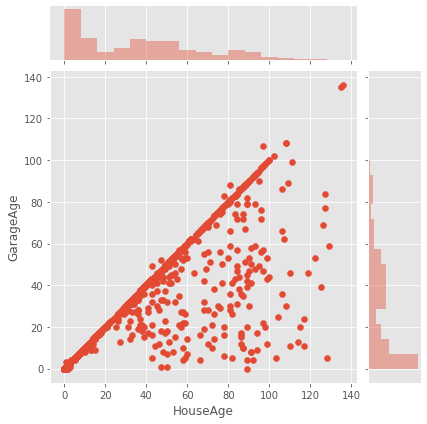

In [119]:
# Check joinplots
sns.jointplot(housing['HouseAge'], housing['GarageAge'])

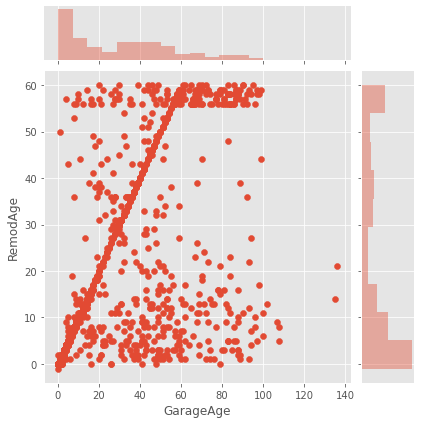

In [120]:
# Check joinplots
sns.jointplot(housing['GarageAge'], housing['RemodAge'])

In [121]:
# Drop original 4 year variables
var = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
housing.drop(var, axis=1, inplace=True)

In [122]:
# Drop GarageAge since Remodel captures this and more
housing.drop('GarageAge', axis=1, inplace=True)

In [123]:
var = ['MoSold', 'SaleType', 'SaleCondition']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1177.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:09:02   Log-Likelihood:                         -7287.8
No. Observations:                1433   AIC:                                  1.460e+04
Df Residuals:                    1422   BIC:                                  1.466e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

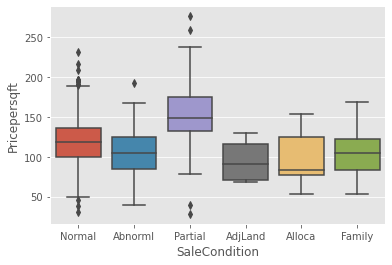

In [124]:
# SaleCondition doesn't appears statistically significant
sns.boxplot(data=housing, x='SaleCondition', y='Pricepersqft')

In [125]:
# Consolidate SaleCondition for low volume catgories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Family':
        return 'Other'
    if val == 'Alloca':
        return 'Other'
    if val == 'AdjLand':
        return 'Other'
    else: return val
housing['SaleCondition'] = housing['SaleCondition'].apply(categorize)
housing['SaleCondition'].value_counts()

Normal     1172
Partial     125
Abnorml     100
Other        36
Name: SaleCondition, dtype: int64

In [126]:
housing['SaleType'].value_counts()

WD       1241
New       122
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [127]:
# Consolidate SaleType into 3  categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'COD':
        return 'Other'
    if val == 'ConLD':
        return 'Other'
    if val == 'ConLI':
        return 'Other'
    if val == 'ConLw':
        return 'Other'
    if val == 'CWD':
        return 'Other'
    if val == 'Oth':
        return 'Other'
    if val == 'Con':
        return 'Other'
    else: return val
housing['SaleType'] = housing['SaleType'].apply(categorize)
housing['SaleType'].value_counts()

WD       1241
New       122
Other      70
Name: SaleType, dtype: int64

In [128]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
1                56  119.889399
10               88  122.020740
11               77  119.368792
12               58  124.125260
2                51  124.549393
3               104  119.774513
4               138  117.820257
5               203  121.604656
6               245  118.965100
7               232  120.756943
8               119  120.388801
9                62  120.529100

In [129]:
# Consolidate Months into seasons
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val in ['12','1','2']:
        return 'Winter'
    if val in ['3','4','5']:
        return 'Spring'
    if val in ['6','7','8']:
        return 'Summer'
    if val in ['9','10','11']:
        return 'Fall'
housing['MoSold'] = housing['MoSold'].apply(categorize)
housing['MoSold'].value_counts()

Summer    596
Spring    445
Fall      227
Winter    165
Name: MoSold, dtype: int64

In [130]:
# Aggregating prices to identify monthly seasonality
colFun = {'Pricepersqft':['count', 'mean']}
analysis=housing.groupby('MoSold').agg(colFun)
analysis

Pricepersqft            
              count        mean
MoSold                         
Fall            227  120.713772
Spring          445  120.003348
Summer          596  119.946859
Winter          165  122.818730

In [131]:
# Rename month variable to season
housing.rename(columns={'MoSold': 'Season'}, inplace=True)

In [132]:
# Variables associated with external features of house
var = ['Fence', 'Functional', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              3341.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:09:02   Log-Likelihood:                         -7270.6
No. Observations:                1433   AIC:                                  1.455e+04
Df Residuals:                    1429   BIC:                                  1.457e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [133]:
# Simplify Functional to 4 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Sev':
        return 'Maj'
    elif val == 'Maj1':
        return 'Maj'
    elif val == 'Maj2':
        return 'Maj'
    elif val == 'Min1':
        return 'Min'
    elif val == 'Min2':
        return 'Min'
    elif val == 'Mod':
        return 'Mod'
    elif val == 'Typ':
        return 'Typ'
    else: return val
housing['Functional'] = housing['Functional'].apply(categorize)
housing['Functional'].value_counts()

Typ    1337
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64

In [134]:
# Lots of variables that don't really have explanatory power and also those that contribute to multi-collinearity
var = ['Fence', 'Foundation', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'RoofStyle']
housing.drop(var, axis=1, inplace=True)

In [135]:
# Variables associated with external features of house
var = ['Functional', 'ExterCond', 'ExterQual', 'MasVnrType', 'MasVnrArea']
for v in var:
    print(housing[v].value_counts())

Typ    1337
Min      63
Maj      20
Mod      13
Name: Functional, dtype: int64
TA    1259
Gd     143
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    886
Gd    483
Ex     52
Fa     12
Name: ExterQual, dtype: int64
None       852
BrkFace    442
Stone      126
BrkCmn      13
Name: MasVnrType, dtype: int64
0.000000    850
0.200472      4
0.029257      3
0.065191      3
0.199292      3
           ... 
0.310935      1
0.079952      1
0.036903      1
0.067265      1
0.098784      1
Name: MasVnrArea, Length: 567, dtype: int64


In [136]:
# Consolidate ExterCond to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Po':
        return 'Fa'
    elif val == 'Ex':
        return 'Gd'
    else: return val
housing['ExterCond'] = housing['ExterCond'].apply(categorize)
housing['ExterCond'].value_counts()

TA    1259
Gd     146
Fa      28
Name: ExterCond, dtype: int64

In [137]:
# Consolidate ExterQual to 3 categories
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'Fa':
        return 'TA'
    else: return val
housing['ExterQual'] = housing['ExterQual'].apply(categorize)
housing['ExterQual'].value_counts()

TA    898
Gd    483
Ex     52
Name: ExterQual, dtype: int64

In [138]:
# Variables associated with Masonry veneer
var = ['MasVnrType', 'MasVnrArea']

var = ['MasVnrArea']
x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

var = ['MasVnrType']
x = pd.get_dummies(housing[var], columns=var, prefix=var, drop_first=True)
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

x['MasVnrArea'] = housing['MasVnrArea']
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              619.5
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                   6.13e-114
Time:                        00:09:02   Log-Likelihood:                         -8687.7
No. Observations:                1433   AIC:                                  1.738e+04
Df Residuals:                    1432   BIC:                                  1.738e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
# Drop MasVnrArea since quality has more explanatory power
housing.drop('MasVnrArea', axis=1, inplace=True)

In [140]:
# Variables associated with Overall
var = ['OverallQual', 'OverallCond']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.322e+04
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:09:02   Log-Likelihood:                         -6906.3
No. Observations:                1433   AIC:                                  1.381e+04
Df Residuals:                    1432   BIC:                                  1.382e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [141]:
# Overall condition and quality both significant so keep both

In [142]:
# Variables relating to land and outside
var = ['LandSlope', 'Utilities', 'LotShape', 'Condition2', 'LotConfig', 'LandContour', 'Alley']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              29.47
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                    2.87e-13
Time:                        00:09:02   Log-Likelihood:                         -8916.3
No. Observations:                1433   AIC:                                  1.784e+04
Df Residuals:                    1431   BIC:                                  1.785e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [143]:
# Drop Landslope, Utilities and Lotshape since no explanatory power
var = ['LandSlope', 'Utilities', 'LotShape']
housing.drop(var, axis=1, inplace=True)

In [144]:
var = ['Condition2', 'LotConfig', 'LandContour', 'Alley']
for v in var:
    print(housing[v].value_counts())

Norm      1419
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
PosA         1
Name: Condition2, dtype: int64
Inside     1035
Corner      260
CulDSac      87
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Lvl    1301
Bnk      61
HLS      47
Low      24
Name: LandContour, dtype: int64
N       1342
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [145]:
#These variables have low explanatory power and likely to just contribute to multi-collinearity
var = ['Condition2', 'Alley', 'LandContour', 'LotConfig']
housing.drop(var, axis=1, inplace=True)

In [146]:
housing['Condition1'].value_counts()

Norm      1237
Feedr       79
Artery      47
RRAn        25
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [147]:
# Consolidate Condition1 for railroad variables and positive feature variables
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == 'RRAn':
        return 'RR'
    if val == 'RRNn':
        return 'RR'
    if val == 'RRNe':
        return 'RR'
    if val == 'RRAe':
        return 'RR'
    if val == 'PosN':
        return 'Pos'
    if val == 'PosA':
        return 'Pos'
    else: return val
housing['Condition1'] = housing['Condition1'].apply(categorize)
housing['Condition1'].value_counts()

Norm      1237
Feedr       79
Artery      47
RR          43
Pos         27
Name: Condition1, dtype: int64

In [148]:
# Issues with HouseStyle categories, perhaps consider consolidating them
housing.HouseStyle.value_counts()

1Story    706
2Story    442
1.5Fin    151
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

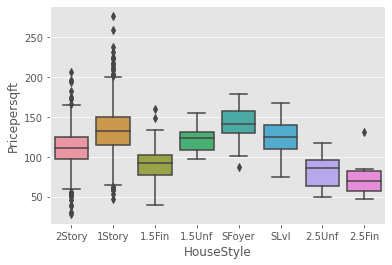

In [149]:
sns.boxplot(data=housing,x='HouseStyle',y='Pricepersqft')
# So much variablity in 1 and 2 story so consilidate with 1.5 and 2.5 stories

In [150]:
# Overall value and quality will take into account if a house is unfinished etc. This feature is combining infomation
# like if a house is finished or unfinished.
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '1.5Fin':
        return '1.5Story'
    elif val == '1.5Unf':
        return '1.5Story'
    elif val == '2.5Unf':
        return '2.5Story'
    elif val == '2.5Fin':
        return '2.5Story'
    elif val == 'SLvl':
        return 'Other'
    elif val == 'SFoyer':
        return 'Other'
    else: return val
housing['HouseStyle'] = housing['HouseStyle'].apply(categorize)
housing['HouseStyle'].value_counts()

1Story      706
2Story      442
1.5Story    165
Other       101
2.5Story     19
Name: HouseStyle, dtype: int64

In [151]:
#Explore neighbourhood and zoning
var = ['HouseStyle', 'BldgType', 'MSSubClass', 'MSZoning', 'Neighborhood']
run_mlr(var)

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              2770.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                        0.00
Time:                        00:09:03   Log-Likelihood:                         -7390.9
No. Observations:                1433   AIC:                                  1.479e+04
Df Residuals:                    1429   BIC:                                  1.481e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [152]:
# Building type is explained by MSSubClass and house style so drop it
# MSZoning is explained by all the other variables, like neighbourhood, house-type, size etc
# Housestyle is explained by MSSubCLass so drop it
var = ['BldgType','MSZoning', 'HouseStyle']
housing.drop(var, axis=1, inplace=True)

In [153]:
housing.MSSubClass.value_counts()

20     521
60     297
50     143
120     87
30      67
160     63
70      60
80      57
90      51
190     26
85      20
75      16
45      12
180     10
40       3
Name: MSSubClass, dtype: int64

In [154]:
# MSSubClass convert from ordinal categorical to nominal categorical
def categorize(val):
    """
    Simple function to categorise relevant variable according to val
    """
    if val == '20':
        return 'A1'
    elif val == '30':
        return 'A2'
    elif val == '40':
        return 'A3'
    elif val == '120':
        return 'A4'
    elif val == '45':
        return 'B1'
    elif val == '50':
        return 'B2'
    elif val == '150':
        return 'B3'
    elif val == '60':
        return 'C1'
    elif val == '70':
        return 'C2'
    elif val == '160':
        return 'C3'
    elif val == '75':
        return 'D1'
    elif val == '80':
        return 'E1'
    elif val == '85':
        return 'E2'
    elif val == '180':
        return 'E3'
    elif val == '90':
        return 'F1'
    elif val == '190':
        return 'F2'
    else: return val
housing['MSSubClass'] = housing['MSSubClass'].apply(categorize)
housing['MSSubClass'].value_counts()

A1    521
C1    297
B2    143
A4     87
A2     67
C3     63
C2     60
E1     57
F1     51
F2     26
E2     20
D1     16
B1     12
E3     10
A3      3
Name: MSSubClass, dtype: int64

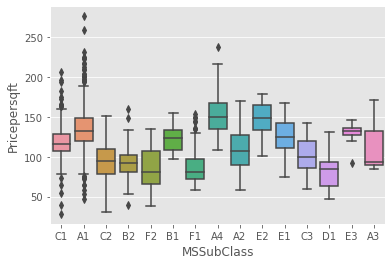

In [155]:
sns.boxplot(data=housing, x='MSSubClass', y='Pricepersqft')

In [156]:
# Bathroom consolidation (weight according to perceived importance)
housing['AllBath'] = 2*housing['FullBath'] + 1.5*housing['HalfBath'] + 1*housing['BsmtFullBath'] + 0.5*housing['BsmtHalfBath']
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'AllBath']
run_mlr(var)

x = housing[var]
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Pricepersqft   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              1215.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):                   2.71e-193
Time:                        00:09:03   Log-Likelihood:                         -8505.0
No. Observations:                1433   AIC:                                  1.701e+04
Df Residuals:                    1432   BIC:                                  1.702e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [157]:
# Drop other housing variables and consolidate into 1 bathroom variable
var = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
housing.drop(var, axis=1, inplace=True)

## Final look at outliers

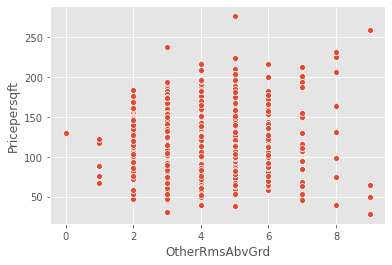

In [158]:
sns.scatterplot(data=housing, x='OtherRmsAbvGrd', y='Pricepersqft')

In [159]:
housing[(housing.OtherRmsAbvGrd == 9)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
809,810,D1,3.788587,OldTown,Norm,5,5,None,TA,TA,...,N,Fall,WD,Normal,106000,49.579046,9,111,44,4.0
898,899,A1,5.464890,NridgHt,Norm,9,5,Stone,Ex,TA,...,N,Spring,New,Partial,611657,258.738156,9,1,0,6.5
1173,1174,B2,5.842515,ClearCr,Norm,5,6,None,TA,TA,...,N,Spring,WD,Normal,200500,64.970836,9,61,13,6.0
1298,1299,C1,11.323467,Edwards,Feedr,10,5,Stone,Ex,TA,...,N,Winter,New,Partial,160000,28.358738,9,0,0,7.5


In [160]:
# Drop 2 record with other rooms = 9
dropindex = housing[(housing.OtherRmsAbvGrd == 9)].index
housing.drop(dropindex, axis=0, inplace=True)

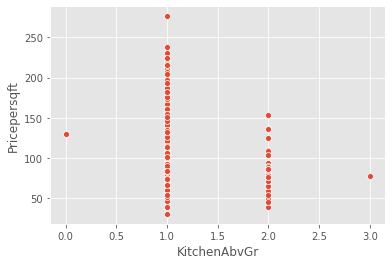

In [161]:
sns.scatterplot(data=housing, x='KitchenAbvGr', y='Pricepersqft')

In [162]:
housing[(housing.KitchenAbvGr < 0.5)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
954,955,F1,9.591837,Edwards,Norm,6,5,BrkFace,TA,TA,...,N,Fall,WD,Other,127500,130.102041,0,31,31,5.0


In [163]:
# Drop 1 record with 0 kitchen
dropindex = housing[(housing.KitchenAbvGr < 0.5)].index
housing.drop(dropindex, axis=0, inplace=True)

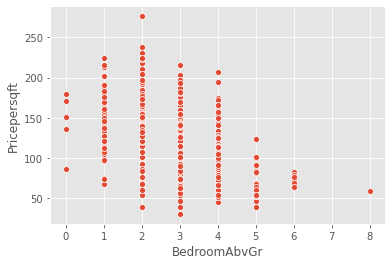

In [164]:
sns.scatterplot(data=housing, x='BedroomAbvGr', y='Pricepersqft')

In [165]:
housing[(housing.BedroomAbvGr == 8) & (housing.Pricepersqft < 75)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
635,636,F2,3.209426,SWISU,Feedr,6,7,None,TA,TA,...,N,Spring,WD,Abnorml,200000,58.910162,6,93,12,4.0


In [166]:
# Drop 1 record with 8 bedrooms
dropindex = housing[(housing.BedroomAbvGr == 8) & (housing.Pricepersqft < 75)].index
housing.drop(dropindex, axis=0, inplace=True)

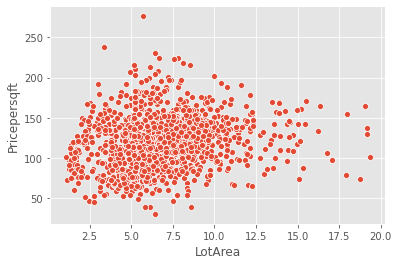

In [167]:
sns.scatterplot(data=housing, x='LotArea', y='Pricepersqft')

In [168]:
housing[(housing.LotArea < 4) & (housing.Pricepersqft > 200)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
1181,1182,A4,3.381961,Crawfor,Norm,8,5,Stone,Ex,TA,...,N,Fall,New,Partial,392500,237.590799,3,0,0,5.5


In [169]:
# Drop 1 record with Lot area and house price outliers
dropindex = housing[(housing.LotArea < 4) & (housing.Pricepersqft > 200)].index
housing.drop(dropindex, axis=0, inplace=True)

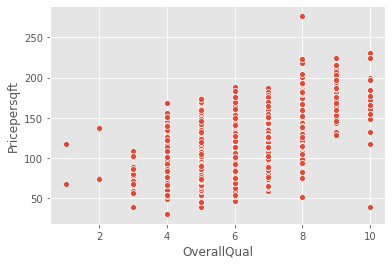

In [170]:
sns.scatterplot(data=housing, x='OverallQual', y='Pricepersqft')

In [171]:
housing[(housing.OverallQual < 3) & (housing.Pricepersqft > 100)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
533,534,A1,14.970060,BrkSide,Norm,1,3,None,TA,Fa,...,N,Winter,WD,Normal,39300,117.664671,1,61,57,2.0
1100,1101,A2,19.178082,SWISU,Norm,2,5,None,TA,TA,...,N,Winter,WD,Normal,60000,136.986301,2,89,59,2.0


In [172]:
# Drop 1 records with overall quality and house price outliers
dropindex = housing[(housing.OverallQual < 3) & (housing.Pricepersqft > 100)].index
housing.drop(dropindex, axis=0, inplace=True)

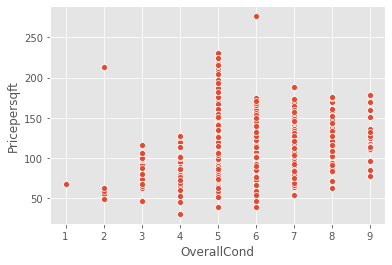

In [173]:
sns.scatterplot(data=housing, x='OverallCond', y='Pricepersqft')

In [174]:
housing[(housing.OverallCond == 2) & (housing.Pricepersqft > 200)]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
378,379,A1,6.139009,StoneBr,Norm,9,2,Stone,Gd,TA,...,N,Summer,New,Partial,394432,212.517241,7,0,0,4.5


In [175]:
# Drop 1 records with overall condition and house price outlier
dropindex = housing[(housing.OverallCond == 2) & (housing.Pricepersqft > 200)].index
housing.drop(dropindex, axis=0, inplace=True)

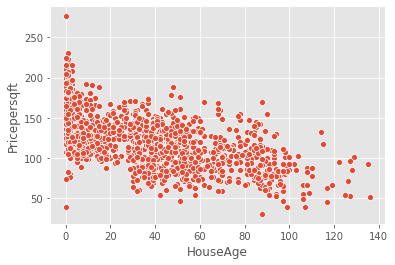

In [176]:
# Final look at outliers
sns.scatterplot(data=housing, x='HouseAge', y='Pricepersqft')

In [177]:
housing[(housing.HouseAge < 10) & ((housing.Pricepersqft > 250) | (housing.Pricepersqft < 50))]

,Id,MSSubClass,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,MasVnrType,ExterQual,ExterCond,...,Shed,Season,SaleType,SaleCondition,SalePrice,Pricepersqft,OtherRmsAbvGrd,HouseAge,RemodAge,AllBath
523,524,C1,8.574423,Edwards,Pos,10,5,Stone,Ex,TA,...,N,Fall,New,Partial,184750,39.510265,8,0,-1,8.5
688,689,A1,5.700493,StoneBr,Norm,8,6,BrkFace,Gd,TA,...,N,Fall,New,Partial,392000,276.250881,5,0,0,5.0


In [178]:
# Drop 4 records with house age and house price outliers
dropindex = housing[(housing.HouseAge < 10) & ((housing.Pricepersqft > 250) | (housing.Pricepersqft < 50))].index
housing.drop(dropindex, axis=0, inplace=True)

In [179]:
housing['Pricepersqft'].describe()

count    1421.000000
mean      120.299617
std        30.251418
min        30.372058
25%       100.102669
50%       120.081019
75%       138.485317
max       231.057452
Name: Pricepersqft, dtype: float64

In [180]:
np.median(housing['Pricepersqft'])

120.08101851851852

# Done with feature assessment, ready to use one-hot encoding and modelling

In [181]:
# Check scores after feature engineering, better than before so it was worth doing feature engineering
run_lasso(housing)

The best score is 0.7967
The training error is 0.1662
The testing error is 0.2015


## One-hot encoding of categorical variables
1. Before one-hot encoding, scale the numerical variables because we will apply PCA
2. Use one-hot encoding to convert categorical features into numerical variables dropping one category to prevent multicollinearity
3. 37 features will explode to about 102, which is still manageable
4. Data will be ready for PCA thereafter

In [182]:
target = housing['Pricepersqft']
features = housing.drop(['Id', 'SalePrice', 'Pricepersqft', 'GrLivArea'], axis=1)
summarydf = summarise_data(features, 'LotArea')

mask = summarydf.VariableType == 'categorical'
features_cat_vars = list(summarydf.loc[mask, 'Predictor'])
mask = summarydf.VariableType == 'numerical'
features_num_vars = list(summarydf.loc[mask, 'Predictor'])

oh_features = pd.get_dummies(features, columns=features_cat_vars, prefix=features_cat_vars, drop_first=True)
oh_features_cat_vars = oh_features.drop(features_num_vars, axis=1).columns

summarydf

,Predictor,ValueCount,MissingCount,TotalCount,MissingPercent,VariableType,CountCategories,Skewness,SpearmanCorr,NumOutliers
0,MSSubClass,1421,0,1421,0.0,categorical,15,0.000000,NaN,0
1,LotArea,1421,0,1421,0.0,numerical,0,0.833396,1.000000,42
2,Neighborhood,1421,0,1421,0.0,categorical,25,0.000000,NaN,0
3,Condition1,1421,0,1421,0.0,categorical,5,0.000000,NaN,0
4,OverallQual,1421,0,1421,0.0,numerical,0,0.238251,-0.320168,1
5,OverallCond,1421,0,1421,0.0,numerical,0,0.715234,0.116829,122
6,MasVnrType,1421,0,1421,0.0,categorical,4,0.000000,NaN,0
7,ExterQual,1421,0,1421,0.0,categorical,3,0.000000,NaN,0
8,ExterCond,1421,0,1421,0.0,categorical,3,0.000000,NaN,0
9,BsmtQual,1421,0,1421,0.0,categorical,3,0.000000,NaN,0


In [183]:
# Store lists of names of numerical and categorical features
print('The number of numerical features are: %.0i' %len(features_num_vars))
print('The number of original categorical features are: %.0i' %len(features_cat_vars))
print('After one-hot encoding, the number of categorical features are: %.0i' %len(oh_features_cat_vars))

The number of numerical features are: 14
The number of original categorical features are: 23
After one-hot encoding, the number of categorical features are: 88


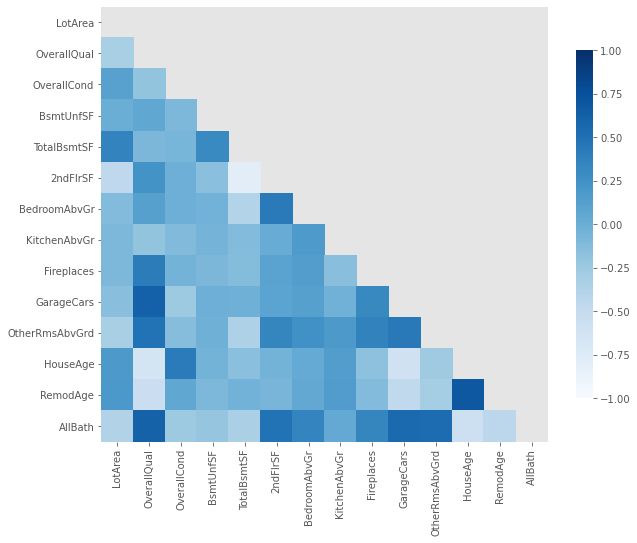

In [184]:
# Check correlation matrix again for multi-collinearity
# Correlation plot of all variables
corr_plot(features, list(features.columns))

In [185]:
# Created scaled version of features by normalising numerical features
scaler = StandardScaler()
std_oh_features = oh_features.copy()
std_oh_features[features_num_vars] = scaler.fit_transform(oh_features[features_num_vars])

In [186]:
std_oh_features[features_num_vars].mean(axis=0)
std_oh_features[features_num_vars].std(axis=0)

LotArea           1.000352
OverallQual       1.000352
OverallCond       1.000352
BsmtUnfSF         1.000352
TotalBsmtSF       1.000352
2ndFlrSF          1.000352
BedroomAbvGr      1.000352
KitchenAbvGr      1.000352
Fireplaces        1.000352
GarageCars        1.000352
OtherRmsAbvGrd    1.000352
HouseAge          1.000352
RemodAge          1.000352
AllBath           1.000352
dtype: float64

## Apply PCA on features to help understand major drivers/features
1. Now that we have no missing or catgorical data, we have exploded the dimensionality and hence sparsity of hyperspace to make  any meaningful predictions.
2. This is ripe to apply PCA to understand components

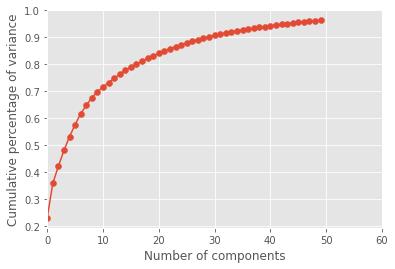

In [187]:
pca = PCA()
numcomp = 50
pca.set_params(n_components=numcomp)
pca.fit(std_oh_features)
plt.scatter(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(numcomp), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 60)
plt.show()

In [188]:
# The first 10 components explain 70% of the variance, the first 20 explains ~83% and the
# first 30 components explain ~90% of the variance. In the scree plot, there is 
# no clear evidence of an elbow to indicate a definitive number of components that explain most of the variance.

# Feature Selection
1. Use mutual_info_regression to identify important and non-important features
2. Pay close attention to categorical (discrete) features
3. Keep data standardised

In [189]:
# Use standardised features for mutual information
discrete_indices = np.array([std_oh_features.columns.get_loc(c) for c in oh_features_cat_vars])
mutual_scores = mutual_info_regression(std_oh_features, target, discrete_features=discrete_indices)
impvars = pd.Series(mutual_scores, index=std_oh_features.iloc[:,:].columns).sort_values(ascending=False)
impvars.head(30)

HouseAge                 0.287140
TotalBsmtSF              0.244778
RemodAge                 0.190478
OverallQual              0.160061
2ndFlrSF                 0.153035
AllBath                  0.147108
GarageCars               0.118398
ExterQual_TA             0.107786
BedroomAbvGr             0.102490
OverallCond              0.094306
KitchenQual_TA           0.081076
MSSubClass_B2            0.077405
BsmtUnfSF                0.076633
LotArea                  0.070289
GarageFinish_Unf         0.064287
ExterQual_Gd             0.061172
SaleCondition_Partial    0.059483
KitchenQual_Gd           0.058561
Neighborhood_NridgHt     0.057664
KitchenAbvGr             0.056391
OtherRmsAbvGrd           0.056221
BsmtQual_TA              0.054826
MasVnrType_Stone         0.054759
GarageType_Detchd        0.050594
PavedDrive_Y             0.045864
MSSubClass_A4            0.042891
FireplaceQu_N            0.042602
MSSubClass_C1            0.041119
MasVnrType_None          0.040542
Neighborhood_C

In [190]:
impvars[impvars==0]

Season_Winter           0.0
Neighborhood_Crawfor    0.0
Condition1_RR           0.0
Season_Summer           0.0
Season_Spring           0.0
Shed_Y                  0.0
MSSubClass_A3           0.0
ScreenPorch_0to075      0.0
dtype: float64

**Feature selection using mutual information** has the advantage of applying to both regression and classification problems. 

It is encouraging that the important features make intuitive sense: **HouseAge, TotalBsmtSF, RemodAge, OverallQual, 2ndFloorSF, AllBath, GarageCars, ExterQual, Bedroom, OverallCondition**.

However, muual information is limiting in the following scenarios:
1. Low sample size (<1000), computation may break down
2. High dimensionality and spars relationships between features and target variable
3. Low sample size **and** high dimensionality. Typically stability selection using a Lasso learner works well

## Train-test split using 70/30
1. Keep 70% of data for training
2. Hold-out 30% for out-of-sample testing

In [191]:
# Store lists of names of numerical and categorical features
rs = 28
X_train, X_test, y_train, y_test = train_test_split(std_oh_features, target, test_size=0.3, random_state=rs)

## Applying machine learning models
1. Use K-fold cross-validation and grid-search to optimise across different models
2. Use default score which is fine for supervised learning regression models that predict continuous variable

In [192]:
def test_ML(models, X_train, y_train, X_test, y_test, iterations = 1):
    """
    Function to test performances of ML algorithms given dictionary of models and dataframe data
    """
    results = {}
    for i in models:
        err_train = []
        err_test = []
        for j in range(iterations):
            err_test.append(np.round(metrics.mean_squared_error(y_test, models[i].predict(X_test),squared=False),2))
            err_train.append(np.round(metrics.mean_squared_error(y_train, models[i].predict(X_train),squared=False),2))
        results[i] = [np.mean(err_train), np.mean(err_test)]
    resultsdf = pd.DataFrame(results).T
    resultsdf.columns = ['Train Error', 'Test Error']
    return resultsdf

In [193]:
def plot_ML_errors(models, model_name, param_name):
    """
    Function that plots the test and training scores of model_name in models object for hyper-parameter param_name
    
    """
    df = pd.DataFrame(models[model_name].cv_results_)
    train_scores_mean = pd.to_numeric(df['mean_train_score'])
    train_scores_std = pd.to_numeric(df['std_train_score'])
    test_scores_mean = pd.to_numeric(df['mean_test_score'])
    test_scores_std = pd.to_numeric(df['std_test_score'])
    xparam = pd.to_numeric(df['param_'+param_name])
    # create chart
    plt.rcParams['figure.figsize'] = (8,6)
    plt.figure()
    plt.title(model_name)
    plt.xlabel(param_name)
    plt.ylabel('R2 Score')
    # plot train scores
    plt.plot(xparam, train_scores_mean, label='Mean Train score',
                 color='navy')
    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(xparam,
                           (train_scores_mean - train_scores_std),
                           (train_scores_mean + train_scores_std),
                           alpha=0.2,
                           color='navy')
    # plot test scores
    plt.plot(xparam, test_scores_mean,
                 label='Mean Test score', color='darkorange')

    # create a shaded area between [mean - std, mean + std]
    plt.gca().fill_between(xparam,
                           (test_scores_mean - test_scores_std),
                           (test_scores_mean + test_scores_std),
                           alpha=0.2,
                           color='darkorange')
    plt.legend(loc='best')
    plt.show()

In [194]:
def residual_plots(models, model_name):
    """
    Function to plot the actual vs predicted values as well as residual plots for training and test data
    for a given model_name in models
    """
    train_errs = y_train - models[model_name].predict(X_train)
    test_errs = y_test - models[model_name].predict(X_test)
    fig, ax = plt.subplots(figsize=(14, 12), ncols=2, nrows=3, sharex=False, sharey=False)
    sns.scatterplot(x=y_train, y=models[model_name].predict(X_train), ax=ax[0,0])
    sns.scatterplot(x=y_test, y=models[model_name].predict(X_test), ax=ax[0,1])
    sns.distplot(train_errs, ax=ax[1,0])
    sns.distplot(test_errs, ax=ax[1,1])
    stats.probplot(train_errs, plot=ax[2,0])
    stats.probplot(train_errs, plot=ax[2,1])
    ax[2,0].set(title='')
    ax[2,1].set(title='')
    ax[0,0].set(title=model_name+': Test data')
    ax[0,1].set(title=model_name+': Train data')

## Apply all models consistently, train using gridsearch where relevant
1. Only OLS doesn't have hyper-parameters by design

In [197]:
# Use all regression models
# Grid Search and stratified K-fold Cross-Validation with K=10
# cross-validation parameter = cvk
cvk=10

lasso_params = {'alpha':np.arange(0,0.05,0.005)}

ridge_params = {'alpha':np.arange(0,10,0.5)}

rf_params = {'max_depth':[35],
                 'n_estimators':[200],
                 'max_features':[50],
                 'min_samples_leaf':[1],
                 'min_samples_split':[2]
                 }

svr_params = {'kernel': ['rbf'],
              'gamma': np.arange(0.02,0.05,0.005),
              'epsilon': [1e-3,1e-4,1e-5],
              'C': [10,15,20]
             }


gbm_params = {'n_estimators':[500],
              'learning_rate':[0.05],
              'max_features':[6],
              'subsample':[0.9],
              'max_depth':[3]
              }


adaboost_params = {'loss':['exponential'],
                   'learning_rate':[3,3.1,3.2,3.3,3.4],
                   'n_estimators':[500]
                   }

xgboost_params = {'objective':['reg:squarederror'],
                  'booster':['gbtree'],
                  'max_depth':[2],
                  'min_child_weight':[5],
                  'gamma':[0.01], 
                  'subsample':[1], 
                  'colsample_bytree':[0.75],
                  'learning_rate':[0.2],
                  'max_depth':[2],
                  'min_child_weight':[7],
                  'n_estimators':[200],
                  'reg_alpha': [0.8],
                  'reg_lambda': [0.7]
                  }


gs_models = {'OLS': LinearRegression().fit(X_train, y_train),
                   
                   'Lasso': ms.GridSearchCV(Lasso(random_state=rs), param_grid=lasso_params, cv=cvk, n_jobs=-1,\
                                          return_train_score=True).fit(X_train, y_train),
                   
                   'Ridge': ms.GridSearchCV(Ridge(random_state=rs), param_grid=ridge_params, cv=cvk, n_jobs=-1,\
                                          return_train_score=True).fit(X_train, y_train),
                   
                   'SVR': ms.GridSearchCV(SVR(verbose=0), param_grid=svr_params, cv=cvk, n_jobs=-1,\
                                         return_train_score=True).fit(X_train, y_train),
                   
                   'RF': ms.GridSearchCV(ensemble.RandomForestRegressor(random_state=rs, warm_start=True),\
                                        param_grid=rf_params, cv=cvk, n_jobs=-1, return_train_score=True).fit(X_train, y_train),
                   
                   'GBM': ms.GridSearchCV(ensemble.GradientBoostingRegressor(random_state=rs, warm_start=True, verbose=0),\
                                        param_grid=gbm_params, cv=cvk, n_jobs=-1, return_train_score=True).fit(X_train, y_train),
                   
                   'AdaBoost': ms.GridSearchCV(ensemble.AdaBoostRegressor(random_state=rs), param_grid=adaboost_params,\
                                             cv=cvk, n_jobs=-1, return_train_score=True).fit(X_train, y_train),
                   
                   'XGBoost': ms.GridSearchCV(xgb.XGBRegressor(random_state=rs), param_grid=xgboost_params, cv=cvk, \
                                            n_jobs=-1, return_train_score=True).fit(X_train, y_train)
                   }
        

In [198]:
# Print Train and Test errors
test_ML(gs_models, X_train, y_train, X_test, y_test)

,Train Error,Test Error
OLS,11.98,13.72
Lasso,12.26,13.29
Ridge,12.30,13.34
SVR,10.62,12.96
RF,5.41,13.84
GBM,9.18,13.19
AdaBoost,13.93,15.99
XGBoost,9.66,13.08


In [199]:
# Check parameters of best estimator
gs_models['SVR'].best_estimator_.get_params()

{'C': 20,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.0001,
 'gamma': 0.025,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 0}

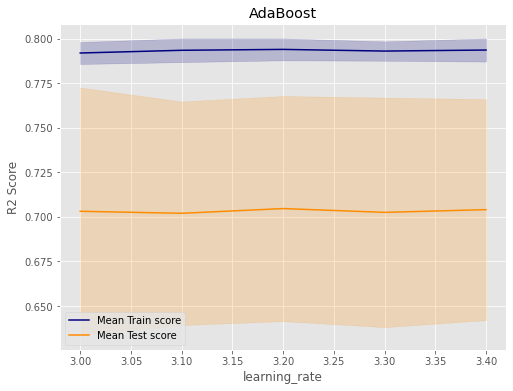

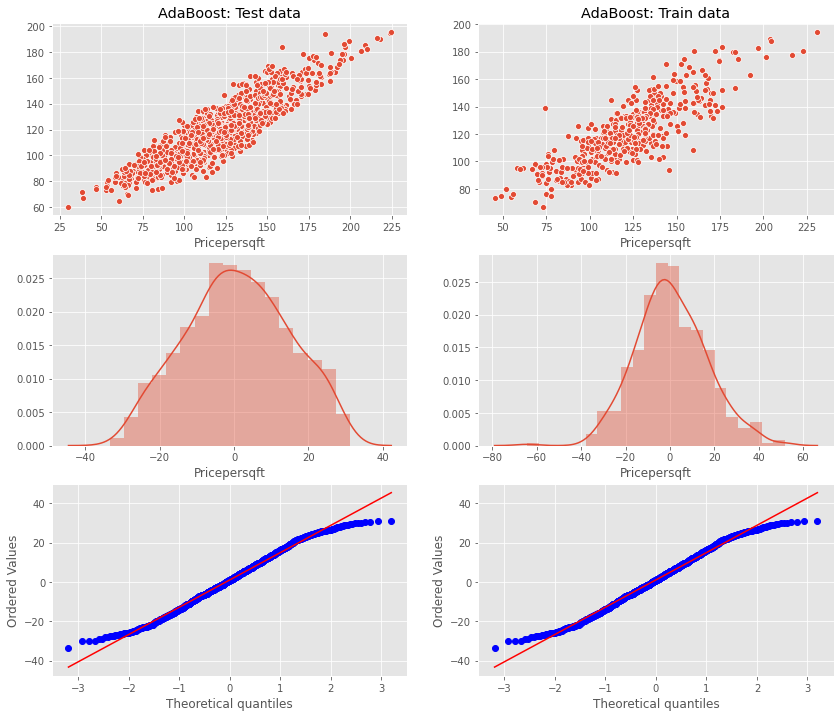

In [200]:
# Plot learning curve
plot_ML_errors(gs_models, 'AdaBoost', 'learning_rate')
# Check residual plots
residual_plots(gs_models, 'AdaBoost')

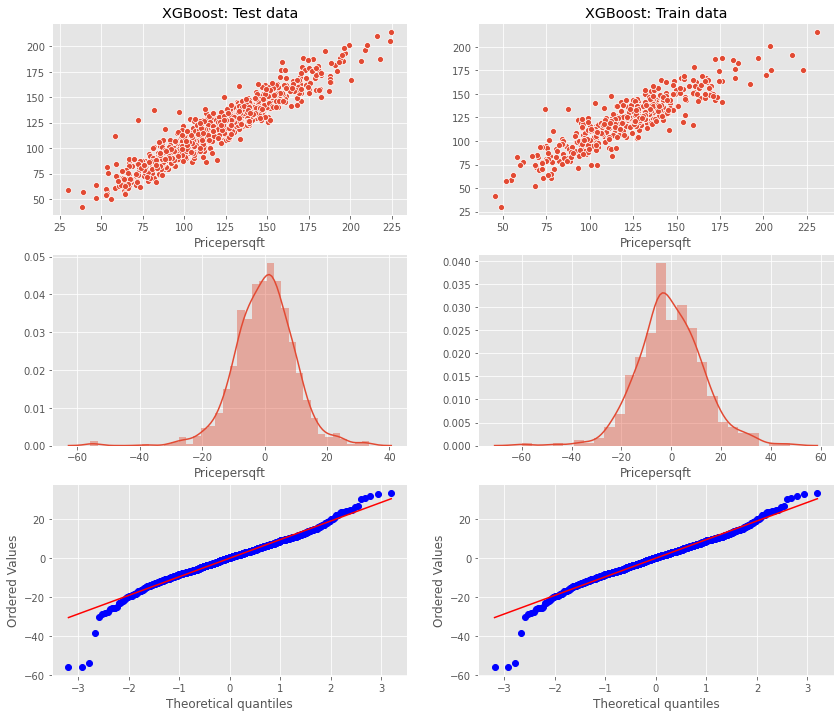

In [201]:
# Check XGBoost plots
residual_plots(gs_models, 'XGBoost')

## Check feature importance
1. sklearn feature_importance only available for tree-based models
2. Have to use coefficients for linear models
3. Permutation feature importance is model agnostic and can be consistently applied to all

In [202]:
# Use permutation feature importance which is model agnostic.

modlis = ['OLS', 'Lasso', 'Ridge', 'SVR', 'RF','GBM','AdaBoost','XGBoost']
for modname in modlis:
    print('\n')
    r = permutation_importance(gs_models[modname], X_test, y_test, n_repeats=30, random_state=28)
    print(f"{modname}")
    print('='*50)
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{std_oh_features.columns[i]:<25}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")



OLS
SaleType_WD              0.625 +/- 0.047
SaleType_Other           0.284 +/- 0.019
SaleCondition_Partial    0.204 +/- 0.018
HouseAge                 0.191 +/- 0.015
TotalBsmtSF              0.172 +/- 0.015
BsmtUnfSF                0.068 +/- 0.008
LotArea                  0.063 +/- 0.010
OverallQual              0.063 +/- 0.011
OverallCond              0.057 +/- 0.008
KitchenQual_Gd           0.056 +/- 0.005
Functional_Typ           0.042 +/- 0.005
ExterQual_Gd             0.037 +/- 0.005
KitchenQual_TA           0.033 +/- 0.007
ExterQual_TA             0.027 +/- 0.006
BedroomAbvGr             0.026 +/- 0.003
MasVnrType_Stone         0.023 +/- 0.004
GarageFinish_N           0.022 +/- 0.004
MasVnrType_BrkFace       0.022 +/- 0.005
MasVnrType_None          0.020 +/- 0.006
OtherRmsAbvGrd           0.018 +/- 0.006
Neighborhood_Edwards     0.016 +/- 0.004
Neighborhood_OldTown     0.014 +/- 0.004
GarageCars               0.013 +/- 0.006
Neighborhood_Mitchel     0.013 +/- 0.004
Neighborho

AdaBoost
TotalBsmtSF              0.249 +/- 0.017
HouseAge                 0.142 +/- 0.015
LotArea                  0.069 +/- 0.010
OverallCond              0.052 +/- 0.008
BsmtUnfSF                0.036 +/- 0.006
OverallQual              0.035 +/- 0.005
BedroomAbvGr             0.019 +/- 0.002
Functional_Typ           0.006 +/- 0.001
MSSubClass_A4            0.002 +/- 0.000
Neighborhood_OldTown     0.001 +/- 0.000
GarageCond_N             0.001 +/- 0.000
Neighborhood_Crawfor     0.000 +/- 0.000
BsmtQual_TA              0.000 +/- 0.000
KitchenAbvGr             0.000 +/- 0.000
GarageCond_TA            0.000 +/- 0.000
MSSubClass_E2            0.000 +/- 0.000
Neighborhood_NoRidge     0.000 +/- 0.000
MSSubClass_C3            0.000 +/- 0.000


XGBoost
TotalBsmtSF              0.251 +/- 0.019
HouseAge                 0.187 +/- 0.012
OverallQual              0.086 +/- 0.011
OverallCond              0.069 +/- 0.011
BsmtUnfSF                0.066 +/- 0.008
LotArea                  0.058 +/- 0.0

## Conduct final check of important features against target

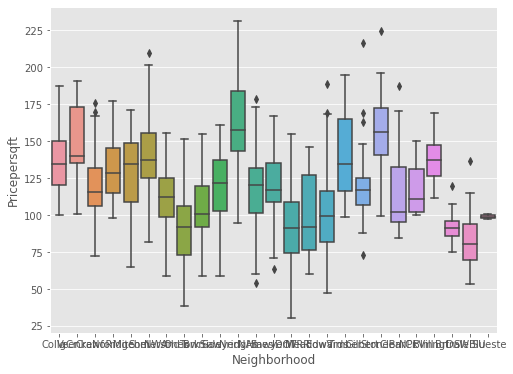

In [203]:
plt.rcParams["figure.figsize"] = (8,6)
sns.boxplot(data=housing, x='Neighborhood', y='Pricepersqft')

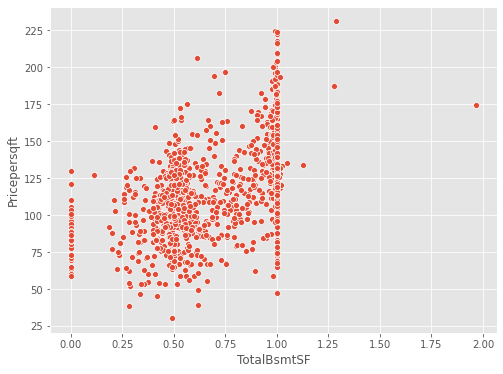

In [204]:
sns.scatterplot(data=housing, x='TotalBsmtSF', y='Pricepersqft')

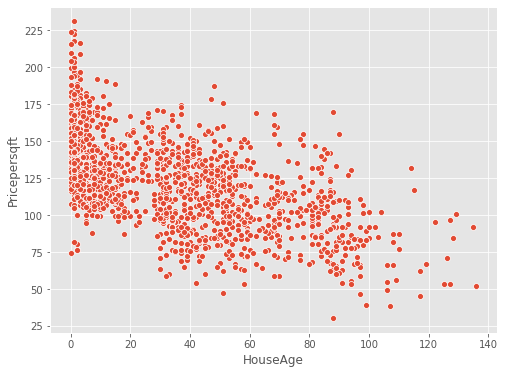

In [205]:
sns.scatterplot(data=housing, x='HouseAge', y='Pricepersqft')

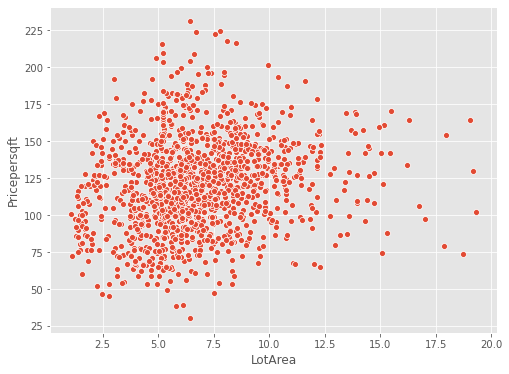

In [206]:
sns.scatterplot(data=housing, x='LotArea', y='Pricepersqft')

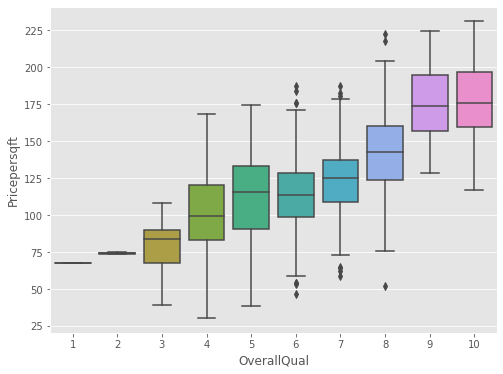

In [207]:
sns.boxplot(data=housing, x='OverallQual', y='Pricepersqft')

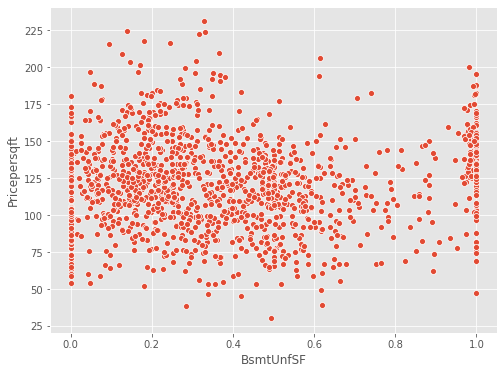

In [208]:
sns.scatterplot(data=housing, x='BsmtUnfSF', y='Pricepersqft')

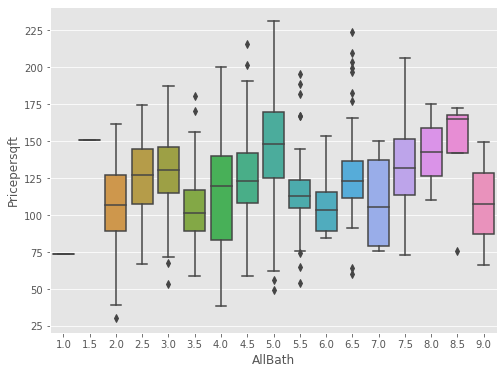

In [209]:
sns.boxplot(data=housing, x='AllBath', y='Pricepersqft')

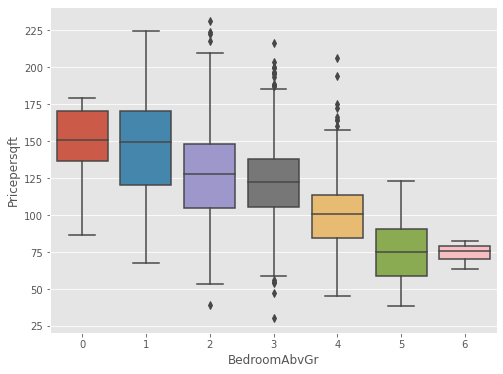

In [210]:
sns.boxplot(data=housing, x='BedroomAbvGr', y='Pricepersqft')

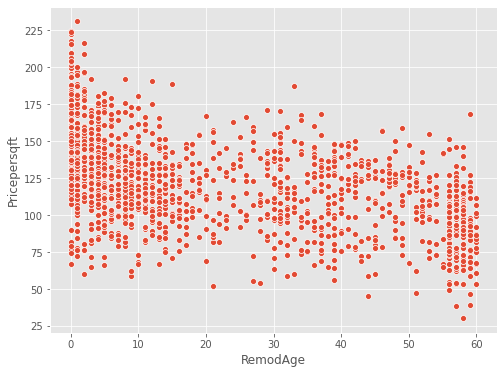

In [211]:
sns.scatterplot(data=housing, x='RemodAge', y='Pricepersqft')

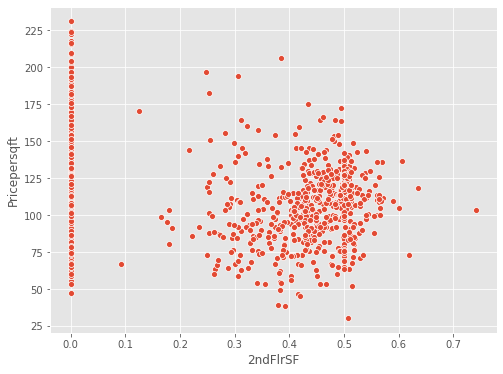

In [212]:
sns.scatterplot(data=housing, x='2ndFlrSF', y='Pricepersqft')

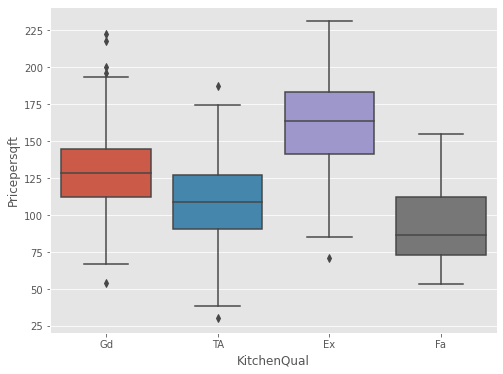

In [213]:
sns.boxplot(data=housing, x='KitchenQual', y='Pricepersqft')

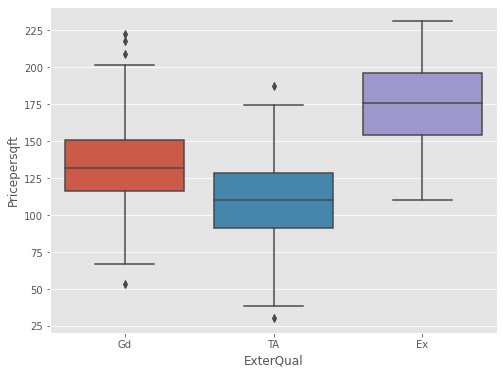

In [214]:
sns.boxplot(data=housing, x='ExterQual', y='Pricepersqft')